In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from datetime import datetime

In [2]:
#reading the data into the dataframe
df=pd.read_csv(r"C:\Users\vamsh\Downloads\AMCAT_data.csv")
df
df1=df #i am just copying the data as a bakup here,incase if i have to use it later

In [3]:
#checking if there are any null values in the data
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [4]:
#data transformtion

df[df.columns[0]].nunique()
#since there is only one value i.e train i am removing it
#since my first column is not so important to me, i like to remove it from the dataframe
df=df.drop(df.columns[0],axis=1)  #alternative way df=df.iloc[:,1:]
df

ID     Salary           DOJ           DOL  \
0     203097   420000.0   6/1/12 0:00       present   
1     579905   500000.0   9/1/13 0:00       present   
2     810601   325000.0   6/1/14 0:00       present   
3     267447  1100000.0   7/1/11 0:00       present   
4     343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...      ...        ...           ...           ...   
3993   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995  355888   320000.0   7/1/13 0:00       present   
3996  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage                         10board  ...  ComputerScience  \
0            84.30  board ofsecondary education,ap  ...               -1   
1            85.40                            cbse  ...               -1   
2            85.00                            cbse  ...               -1   
3            85.60                            cbse  ...               -1   
4            78.00                            cbse  ...               -1   
...            ...                             ...  ...              ...   
3993         52.09                            cbse  ...               -1   
3994         90.00                     state board  ...               -1   
3995         81.86                      bse,odisha  ...               -1   
3996         78.72                     state board  ...              438   
3997         70.60                            cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
0                 -1             -1           -1         -1            0.9737   
1                 -1             -1           -1         -1           -0.7335   
2                 -1             -1           -1         -1            0.2718   
3                 -1             -1           -1         -1            0.0464   
4                 -1             -1           -1         -1           -0.8810   
...              ...            ...          ...        ...               ...   
3993              -1             -1           -1         -1           -0.1082   
3994              -1             -1           -1         -1           -0.3027   
3995              -1             -1           -1         -1           -1.5765   
3996              -1             -1           -1         -1           -0.1590   
3997              -1             -1           -1         -1           -1.1128   

     agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.8128        0.5269      1.35490                -0.4455  
1           0.3789        1.2396     -0.10760                 0.8637  
2           1.7109        0.1637     -0.86820                 0.6721  
3           0.3448       -0.3440     -0.40780                -0.9194  
4          -0.2793       -1.0697      0.09163                -0.1295  
...            ...           ...          ...                    ...  
3993        0.3448        0.2366      0.64980        

In [5]:
df.columns #to see the column names

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [6]:
#now i like to convert the ID,12graduation,CollegeID,CollegeTier,CollegeCityTier,GraduationYear to categorical or object

df['ID']=df['ID'].astype('object')
df['12graduation']=df['12graduation'].astype('category')
df['CollegeID']=df['CollegeID'].astype('category')
df['CollegeTier']=df['CollegeTier'].astype('category')
df['CollegeCityID']=df['CollegeCityID'].astype('category')
df['CollegeCityTier']=df['CollegeCityTier'].astype('category')
df['GraduationYear']=df['GraduationYear'].astype('category')

In [7]:
#converting the DOB,DOJ,DOL columns to date format or extracting only date and making them as object type
#first removing the time portion from the columns before transformation

df['DOB'] = df['DOB'].str.split(' ').str[0]
df['DOJ'] = df['DOJ'].str.split(' ').str[0]
df['DOL']=df['DOL'].str.split(' ').str[0]

df['DOB']=pd.to_datetime(df['DOB'],format='%m/%d/%y').dt.date
df['DOJ']=pd.to_datetime(df['DOJ'],format='%m/%d/%y').dt.date

#to convert DOL column, since it is neither completely the date format nor string format
df['DOL'] = np.where(
    df['DOL'].str.strip().str.lower() == 'present',  # Check if value is "Present"
    pd.NaT,  # If yes, set to NaT
    pd.to_datetime(df['DOL'], format='%m/%d/%y', errors='coerce').dt.date  # Else, convert to date
)

In [8]:
# Convert 'DOB' to datetime format if it's not already
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Current date
current_date = pd.to_datetime(datetime.now())

# Calculate the age (difference in years)
df['Age'] = (current_date - df['DOB']).dt.days // 365

# Display the first few rows to verify the new 'Age' column
print(df[['DOB', 'Age']].head())

         DOB  Age
0 1990-02-19   34
1 1989-10-04   35
2 1992-08-03   32
3 1989-12-05   34
4 1991-02-27   33


In [9]:
#data description
df.shape

(3998, 39)

In [10]:
df.dtypes

ID                               object
Salary                          float64
DOJ                              object
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                   category
12percentage                    float64
12board                          object
CollegeID                      category
CollegeTier                    category
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                  category
CollegeCityTier                category
CollegeState                     object
GraduationYear                 category
English                           int64
Logical                           int64
Quant                             int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   object        
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   object        
 3   DOL                    2123 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   category      
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [12]:
df.describe()

Salary                            DOB  10percentage  \
count  3.998000e+03                           3998   3998.000000   
mean   3.076998e+05  1990-12-06 06:01:15.637819008     77.925443   
min    3.500000e+04            1977-10-30 00:00:00     43.000000   
25%    1.800000e+05            1989-11-16 06:00:00     71.680000   
50%    3.000000e+05            1991-03-07 12:00:00     79.150000   
75%    3.700000e+05            1992-03-13 18:00:00     85.670000   
max    4.000000e+06            1997-05-27 00:00:00     97.760000   
std    2.127375e+05                            NaN      9.850162   

       12percentage   collegeGPA      English      Logical        Quant  \
count   3998.000000  3998.000000  3998.000000  3998.000000  3998.000000   
mean      74.466366    71.486171   501.649075   501.598799   513.378189   
min       40.000000     6.450000   180.000000   195.000000   120.000000   
25%       66.000000    66.407500   425.000000   445.000000   430.000000   
50%       74.400000    71.720000   500.000000   505.000000   515.000000   
75%       82.600000    76.327500   570.000000   565.000000   595.000000   
max       98.700000    99.930000   875.000000   795.000000   900.000000   
std       10.999933     8.167338   104.940021    86.783297   122.302332   

            Domain  ComputerProgramming  ...  MechanicalEngg  ElectricalEngg  \
count  3998.000000          3998.000000  ...     3998.000000     3998.000000   
mean      0.510490           353.102801  ...       22.974737       16.478739   
min      -1.000000            -1.000000  ...       -1.000000       -1.000000   
25%       0.342315           295.000000  ...       -1.000000       -1.000000   
50%       0.622643           415.000000  ...       -1.000000       -1.000000   
75%       0.842248           495.000000  ...       -1.000000       -1.000000   
max       0.999910           840.000000  ...      623.000000      676.000000   
std       0.468671           205.355519  ...       98.123311       87.585634   

       TelecomEngg    CivilEngg  conscientiousness  agreeableness  \
count  3998.000000  3998.000000        3998.000000    3998.000000   
mean     31.851176     2.683842          -0.037831       0.146496   
min      -1.000000    -1.000000          -4.126700      -5.781600   
25%      -1.000000    -1.000000          -0.713525      -0.287100   
50%      -1.000000    -1.000000           0.046400       0.212400   
75%      -1.000000    -1.000000           0.702700       0.812800   
max     548.000000   516.000000           1.995300       1.904800   
std     104.852845    36.658505           1.028666       0.941782   

       extraversion  nueroticism  openess_to_experience          Age  
count   3998.000000  3998.000000            3998.000000  3998.000000  
mean       0.002763    -0.169033              -0.138110    33.374437  
min       -4.600900    -2.643000              -7.375700    27.000000  
25%       -0.604800    -0.868200              -0.669200    32.000000  
50%        0.091400    -0.234400              -0.094300    33.000000  
75%        0.672000     0.526200               0.502400    34.000000  
max        2.535400     3.352500               1.822400    46.000000  
std        0.951471     1.007580               1.008075     1.769877  

[8 rows x 22 columns]

In [13]:
df.head()

ID     Salary         DOJ         DOL               Designation  \
0  203097   420000.0  2012-06-01         NaT   senior quality engineer   
1  579905   500000.0  2013-09-01         NaT         assistant manager   
2  810601   325000.0  2014-06-01         NaT          systems engineer   
3  267447  1100000.0  2011-07-01         NaT  senior software engineer   
4  343523   200000.0  2014-03-01  2015-03-01                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   ... MechanicalEngg  ElectricalEngg TelecomEngg CivilEngg conscientiousness  \
0  ...             -1              -1          -1        -1            0.9737   
1  ...             -1              -1          -1        -1           -0.7335   
2  ...             -1              -1          -1        -1            0.2718   
3  ...             -1              -1          -1        -1            0.0464   
4  ...             -1              -1          -1        -1           -0.8810   

  agreeableness extraversion  nueroticism openess_to_experience Age  
0        0.8128       0.5269      1.35490               -0.4455  34  
1        0.3789       1.2396     -0.10760                0.8637  35  
2        1.7109       0.1637     -0.86820                0.6721  32  
3        0.3448      -0.3440     -0.40780               -0.9194  34  
4       -0.2793      -1.0697      0.09163               -0.1295  33  

[5 rows x 39 columns]

In [14]:
#univariate analysis

numerical_cols=df.select_dtypes(include=[np.number]).columns
numerical_cols


Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age'],
      dtype='object')

In [15]:
categorical_cols=df.select_dtypes(include=['object','category']).columns
categorical_cols

Index(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', '10board',
       '12graduation', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear'],
      dtype='object')

In [16]:
#for numerical analysis

for col in numerical_cols:
    print()
    print(f"Analysis for {col} column:")
    
    min_val=df[col].min()
    max_val=df[col].max()
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()[0]
    skewness=skew(df[col].dropna())
    kurtosis_val=kurtosis(df[col].dropna())
    range_val=df[col].max() - df[col].min()
    iqr=np.percentile(df[col].dropna(),75) - np.percentile(df[col].dropna(),25)
    std=df[col].std()
    
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Skew: {skewness}")
    print(f"Kurtosis: {kurtosis_val}")
    print(f"Range: {range_val}")
    print(f"IQR: {iqr}")
    print(f"STD: {std}")



Analysis for Salary column:
Min: 35000.0
Max: 4000000.0
Mean: 307699.8499249625
Median: 300000.0
Mode: 300000.0
Skew: 6.44866054831297
Kurtosis: 80.82731823061802
Range: 3965000.0
IQR: 190000.0
STD: 212737.4999568574

Analysis for 10percentage column:
Min: 43.0
Max: 97.76
Mean: 77.9254427213607
Median: 79.15
Mode: 78.0
Skew: -0.5907967422390255
Kurtosis: -0.11164680905297963
Range: 54.760000000000005
IQR: 13.989999999999995
STD: 9.850162410652587

Analysis for 12percentage column:
Min: 40.0
Max: 98.7
Mean: 74.46636568284141
Median: 74.4
Mode: 70.0
Skew: -0.032595179202258136
Kurtosis: -0.6314493016154126
Range: 58.7
IQR: 16.599999999999994
STD: 10.999933102957728

Analysis for collegeGPA column:
Min: 6.45
Max: 99.93
Mean: 71.48617058529265
Median: 71.72
Mode: 70.0
Skew: -1.2487404274031384
Kurtosis: 10.21994936069596
Range: 93.48
IQR: 9.920000000000002
STD: 8.167337651961981

Analysis for English column:
Min: 180
Max: 875
Mean: 501.64907453726863
Median: 500.0
Mode: 475
Skew: 0.191924

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


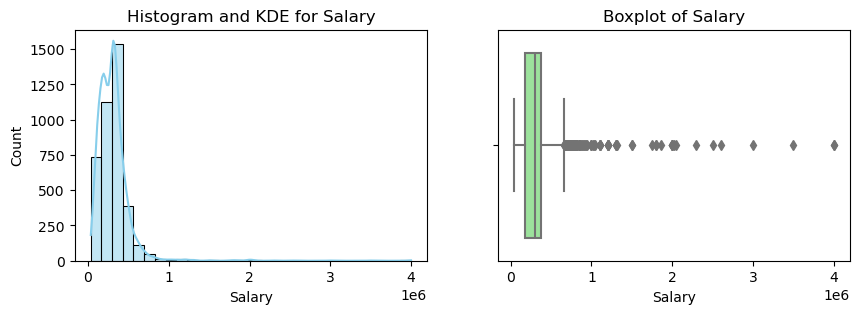

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


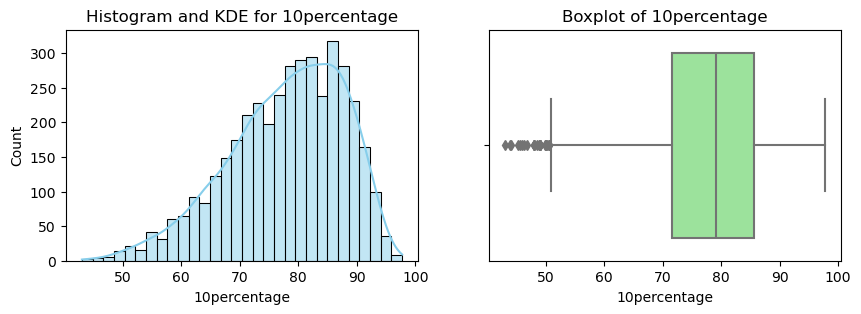

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


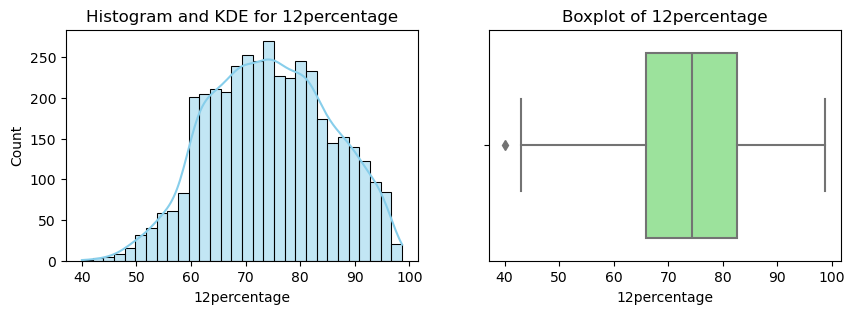

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


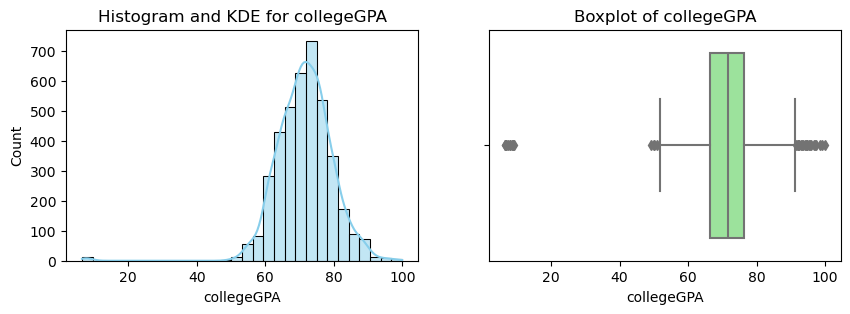

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


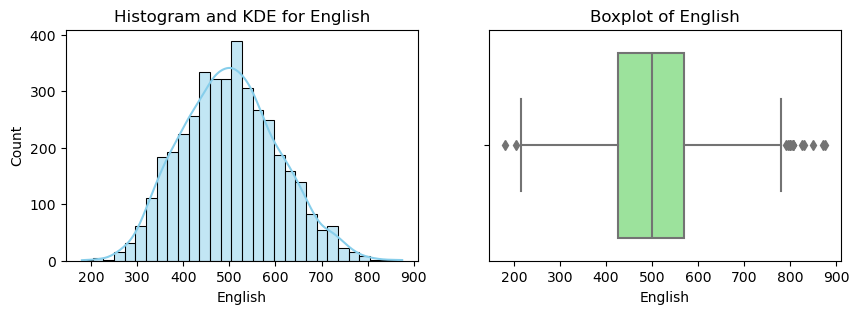

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


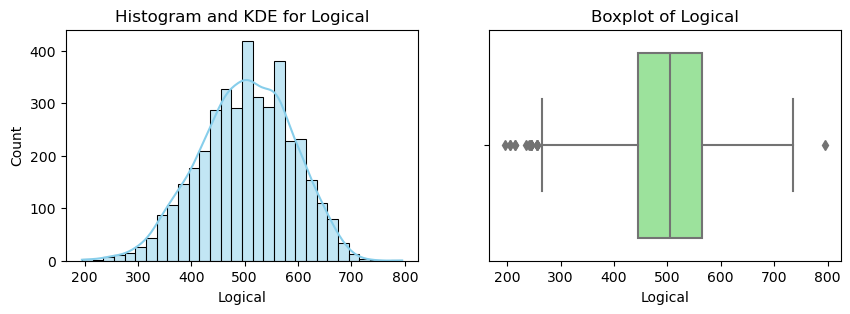

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


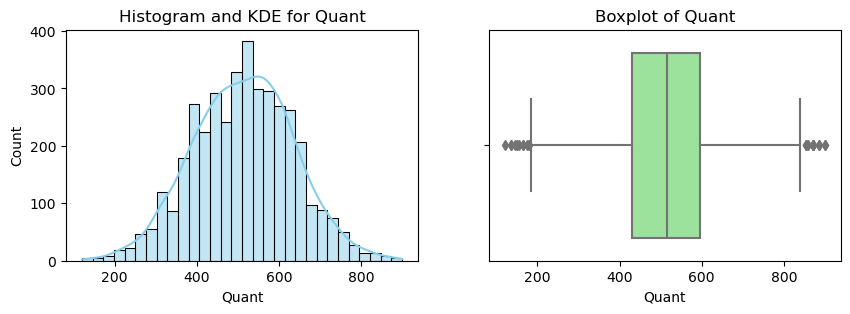

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


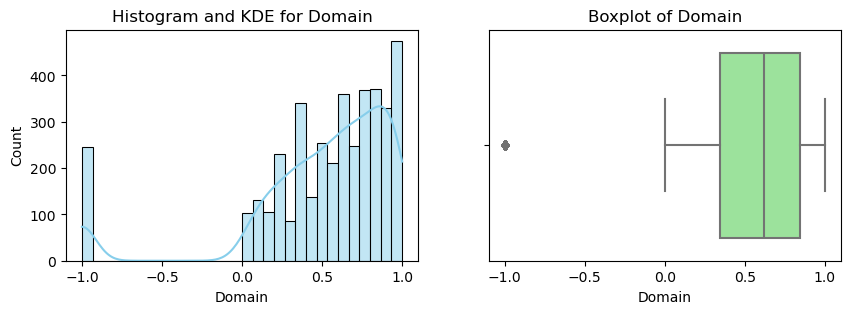

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


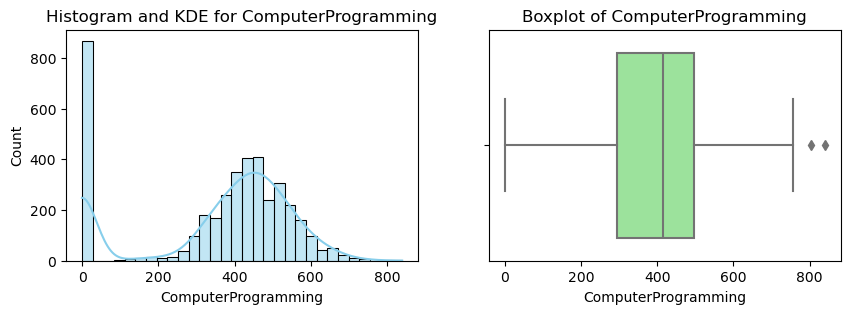

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


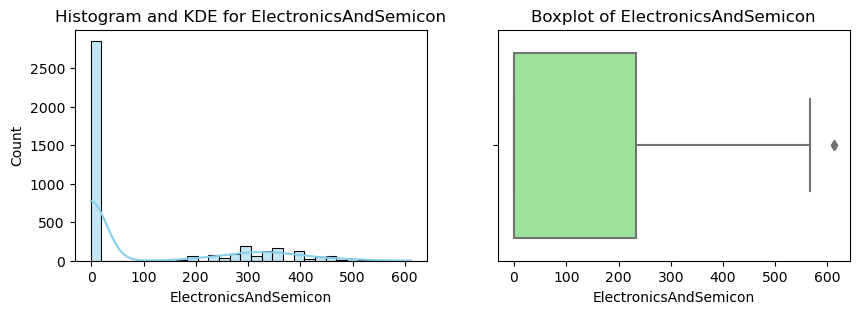

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


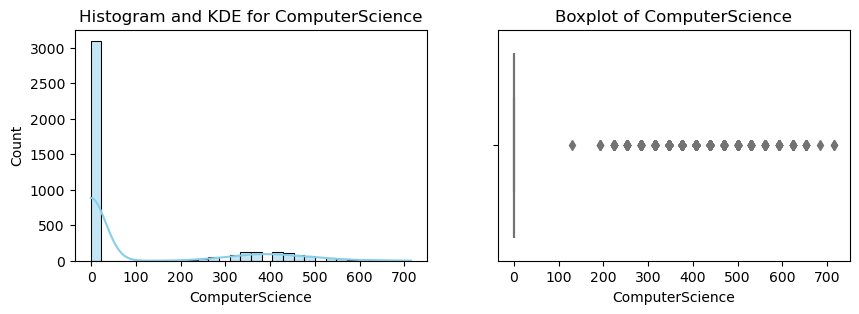

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


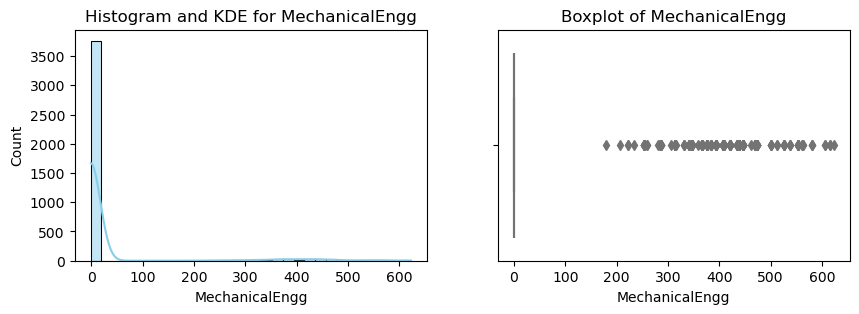

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


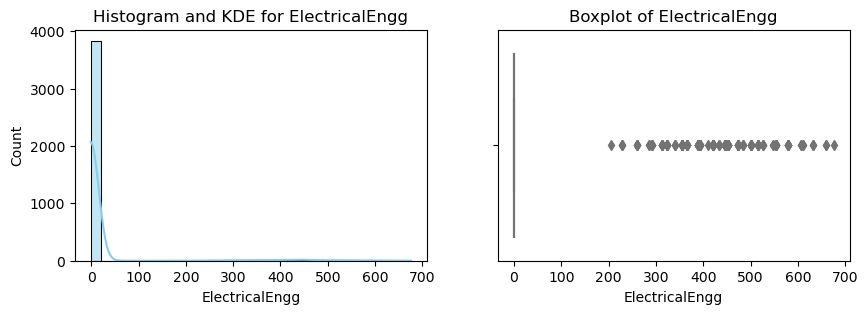

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


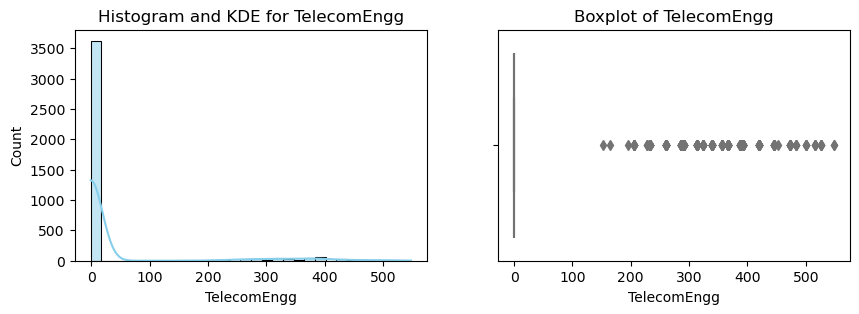

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


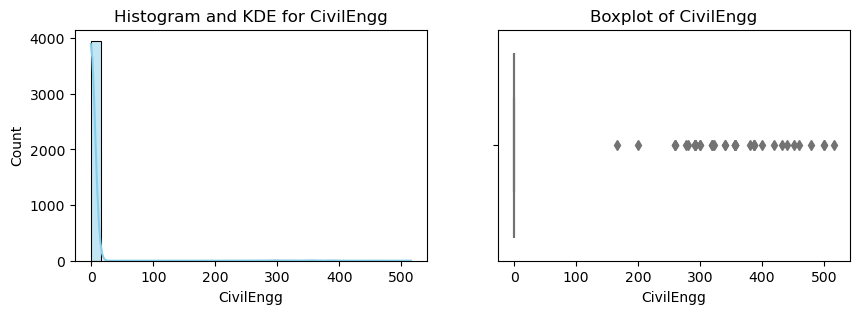

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


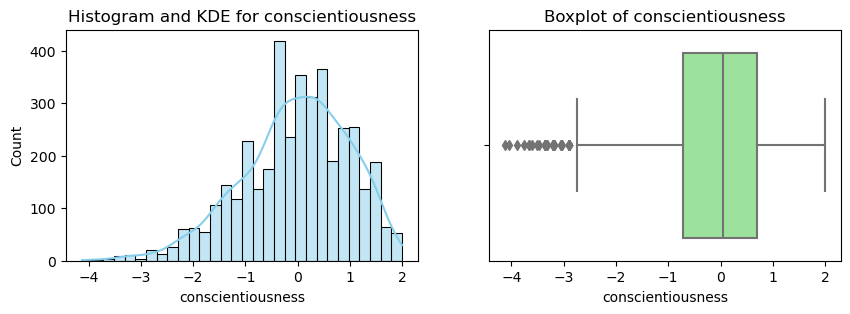

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


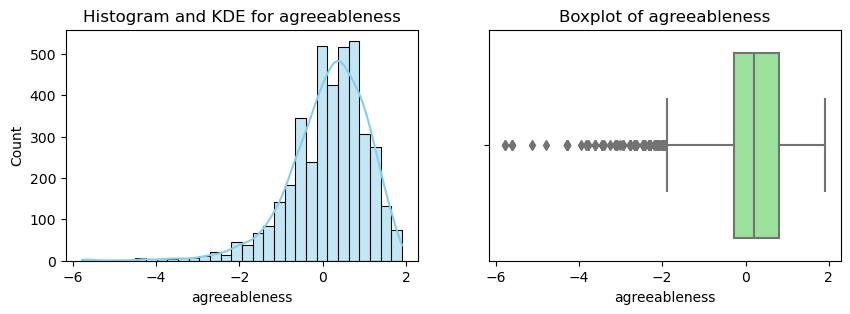

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


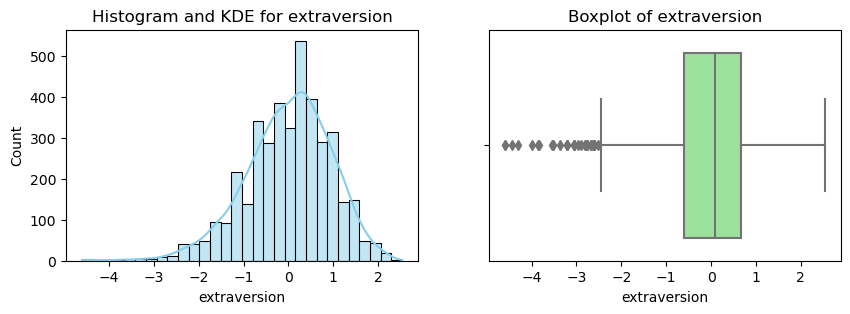

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


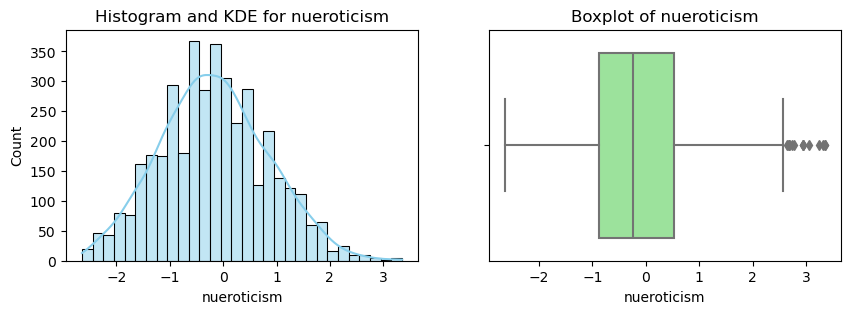

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


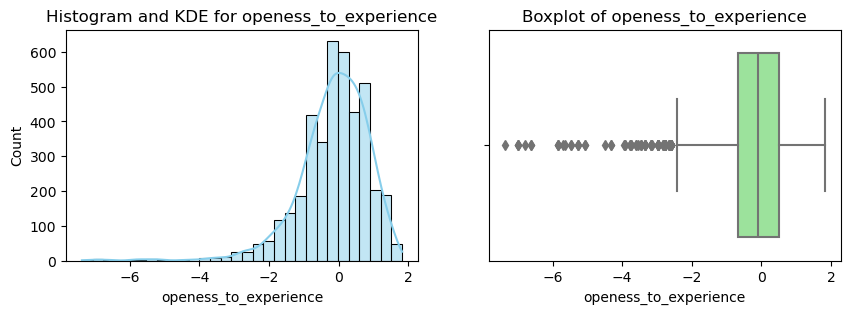

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


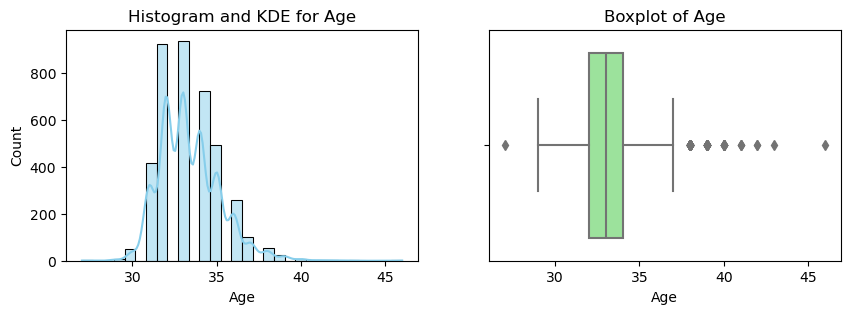

In [17]:
#univariate visual analysis for numerical columns

for col in numerical_cols:
    plt.figure(figsize=(10,3))
    
    #Histogram with KDE plot
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,bins=30,color='skyblue')
    plt.title(f"Histogram and KDE for {col}")
    
    #Box plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col],color='lightgreen')
    plt.title(f"Boxplot of {col}")
    
    plt.show()

In [18]:
#for categorical analysis

#categorical_cols=df.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
    print()
    print(f"Analysis for {col} column:")
    
    unique_val=df[col].unique()
    nunique_val=df[col].nunique()
    value_counts=df[col].value_counts()
    
    print(f"Unique values: {unique_val}")
    print(f"No of unique values: {nunique_val}")
    print(f"value counts: \n{value_counts}")
    print()


Analysis for ID column:
Unique values: [203097 579905 810601 ... 355888 947111 324966]
No of unique values: 3998
value counts: 
ID
203097     1
283847     1
1118955    1
327371     1
587792     1
          ..
355018     1
806160     1
102065     1
462964     1
324966     1
Name: count, Length: 3998, dtype: int64


Analysis for DOJ column:
Unique values: [datetime.date(2012, 6, 1) datetime.date(2013, 9, 1)
 datetime.date(2014, 6, 1) datetime.date(2011, 7, 1)
 datetime.date(2014, 3, 1) datetime.date(2014, 8, 1)
 datetime.date(2014, 7, 1) datetime.date(2013, 7, 1)
 datetime.date(2011, 4, 1) datetime.date(2011, 8, 1)
 datetime.date(2013, 12, 1) datetime.date(2014, 1, 1)
 datetime.date(2013, 8, 1) datetime.date(2014, 9, 1)
 datetime.date(2010, 11, 1) datetime.date(2012, 8, 1)
 datetime.date(2013, 10, 1) datetime.date(2012, 9, 1)
 datetime.date(2011, 1, 1) datetime.date(2015, 2, 1)
 datetime.date(2014, 11, 1) datetime.date(2011, 12, 1)
 datetime.date(2014, 10, 1) datetime.date(2015, 1, 1)
 

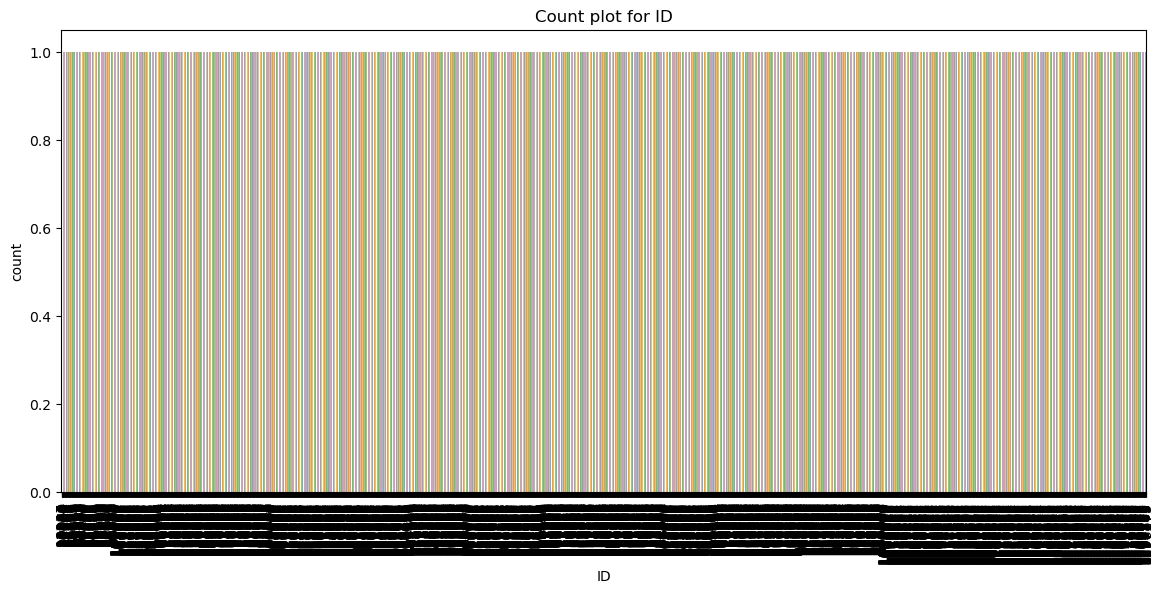

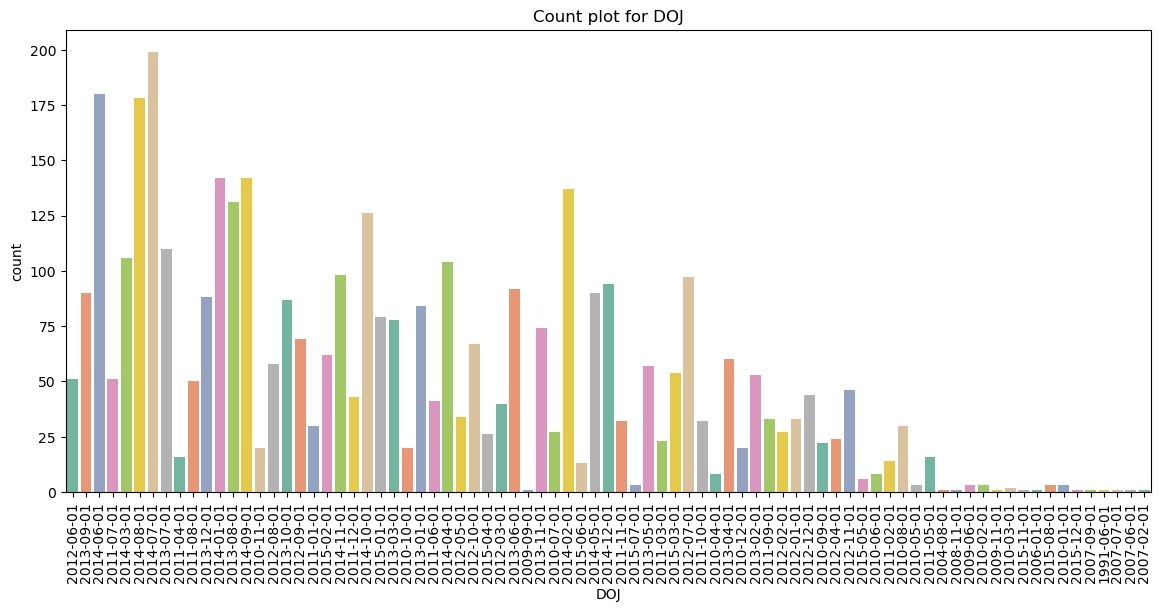

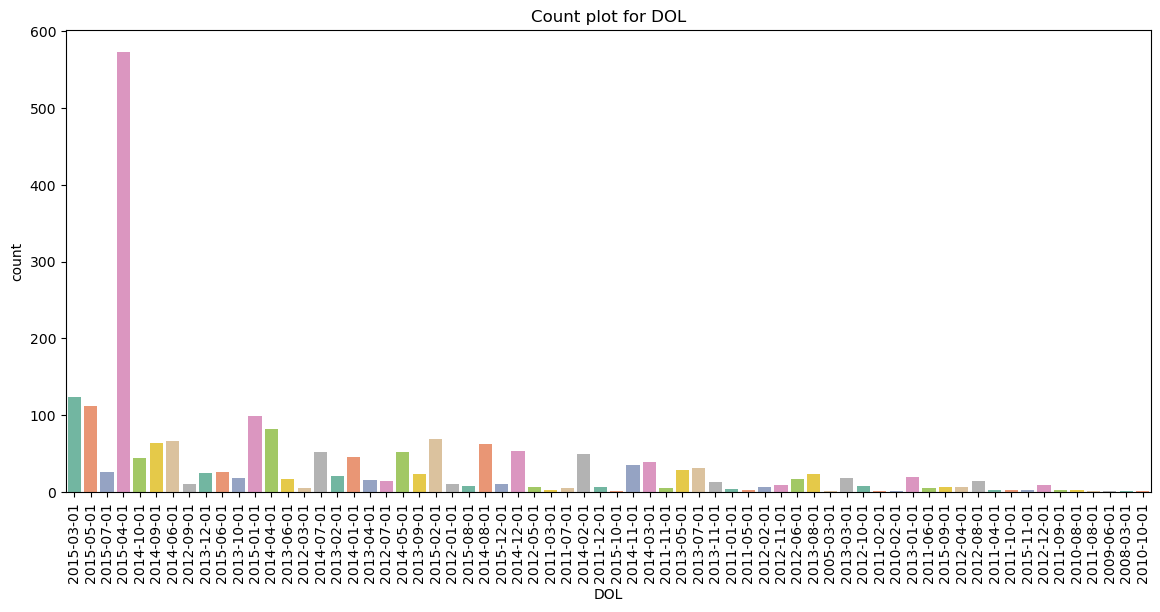

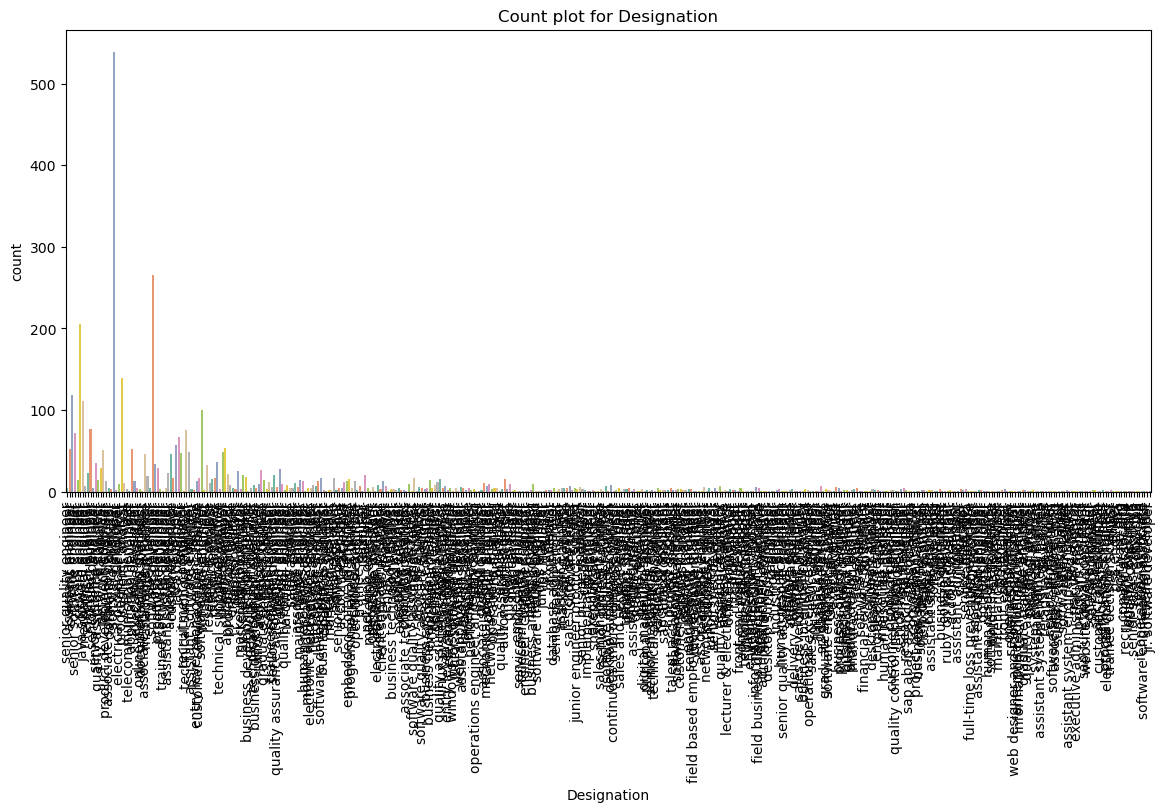

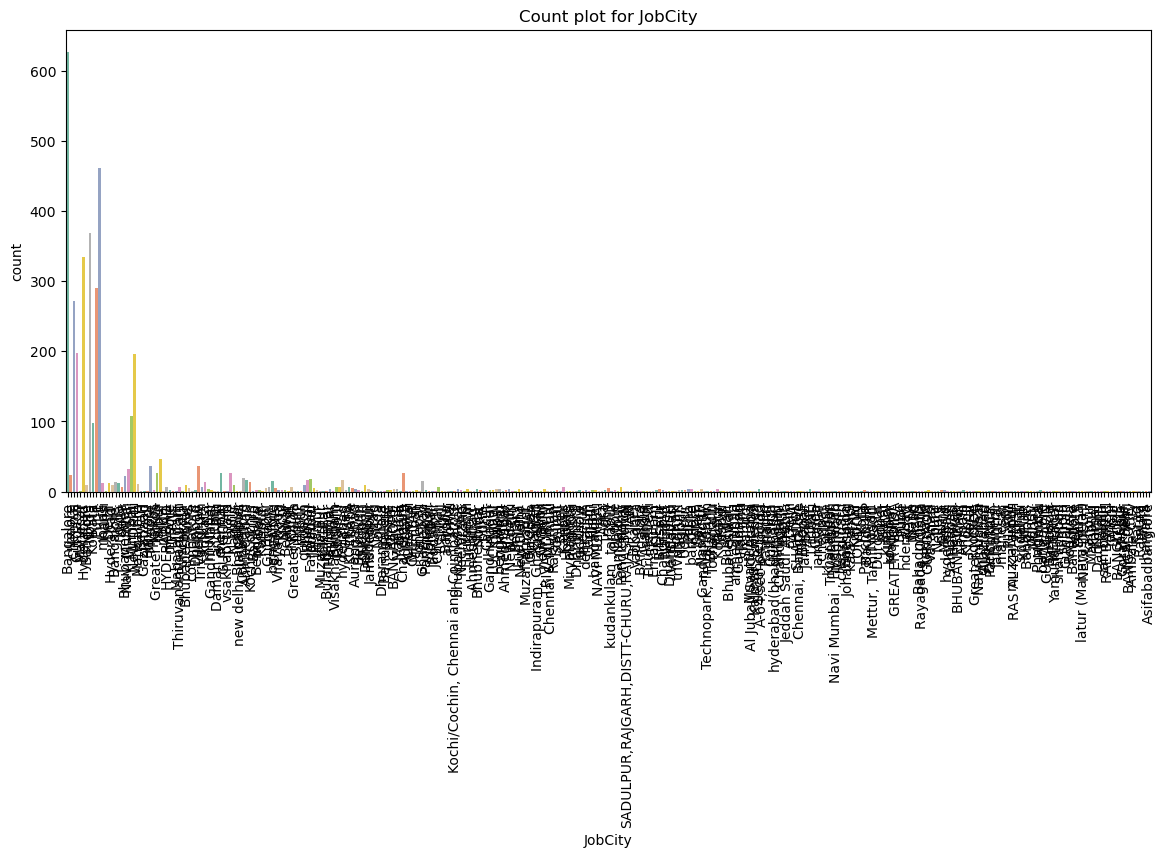

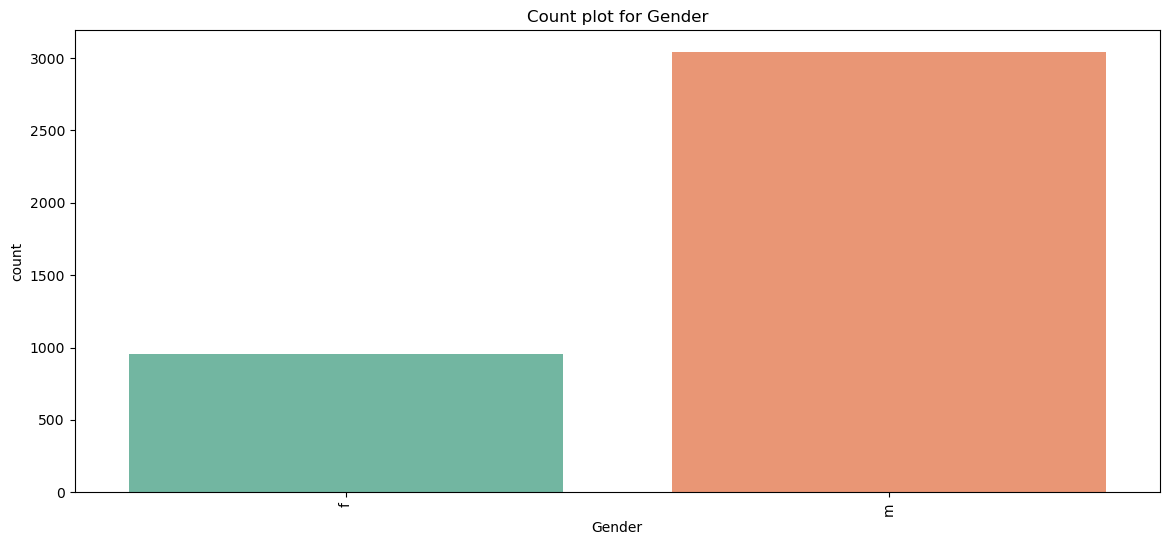

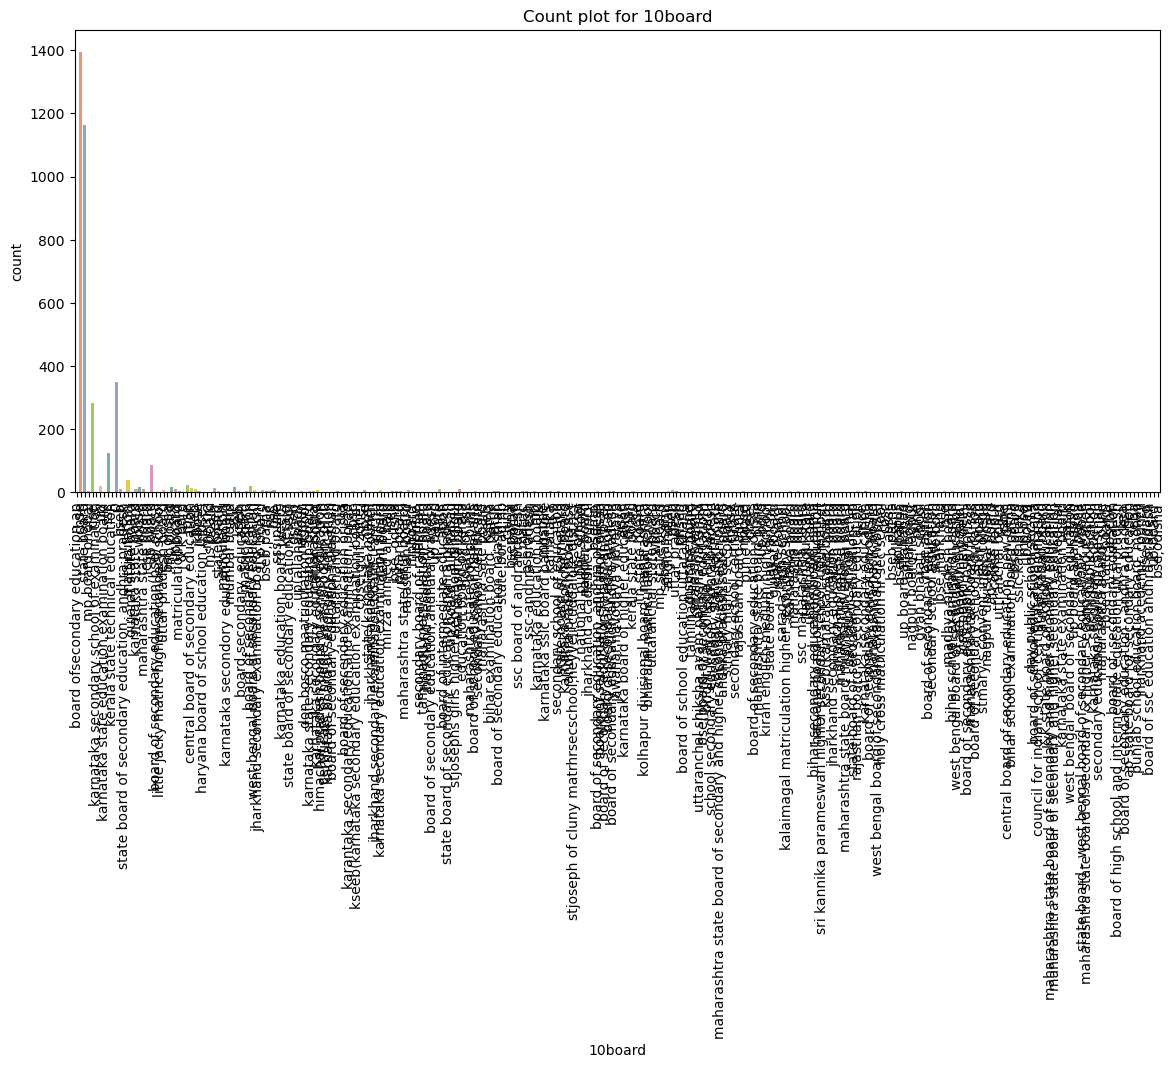

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


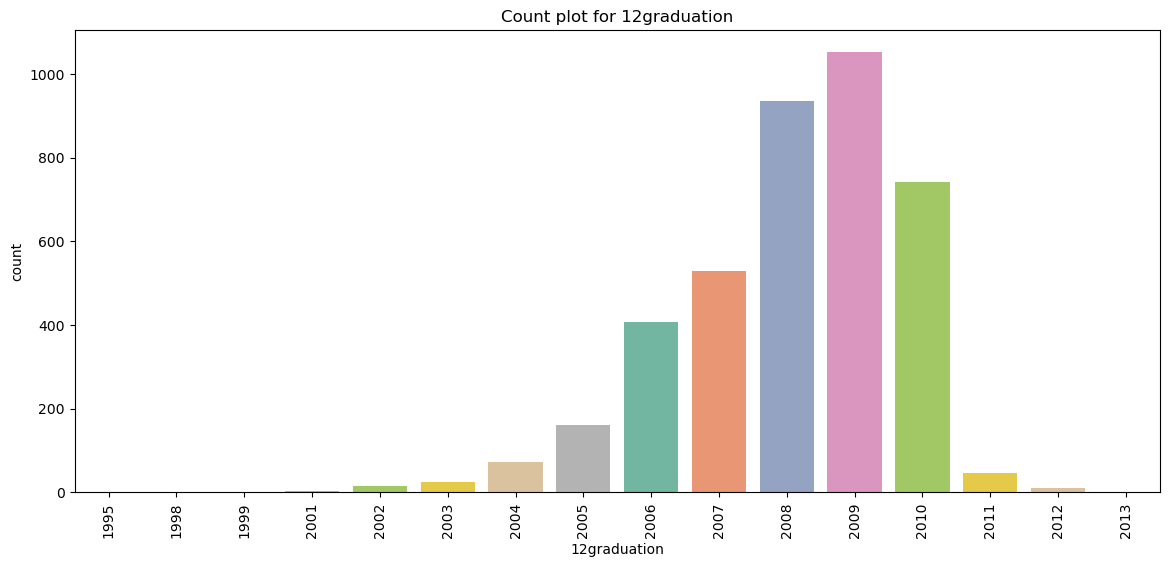

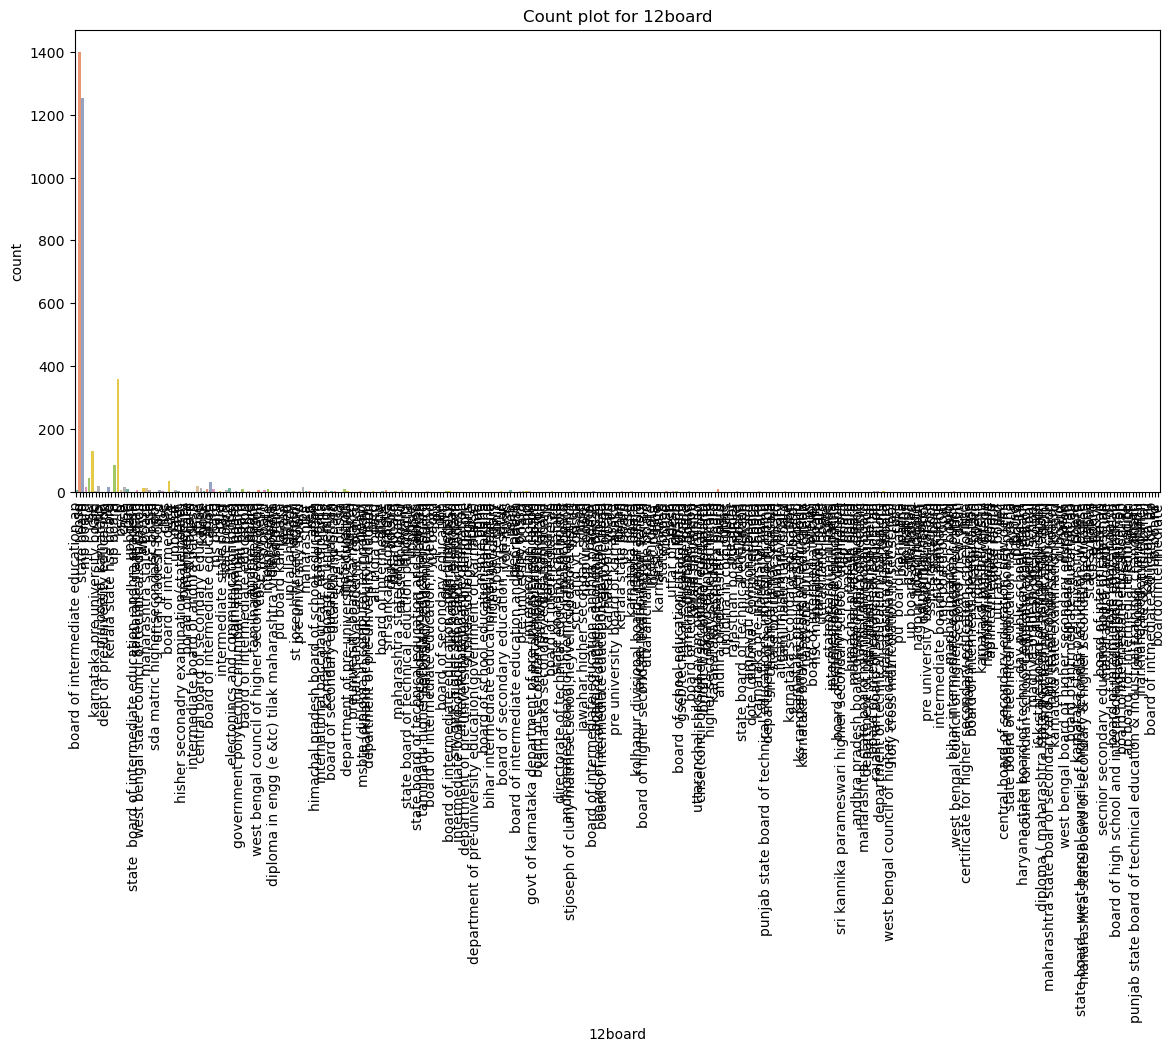

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


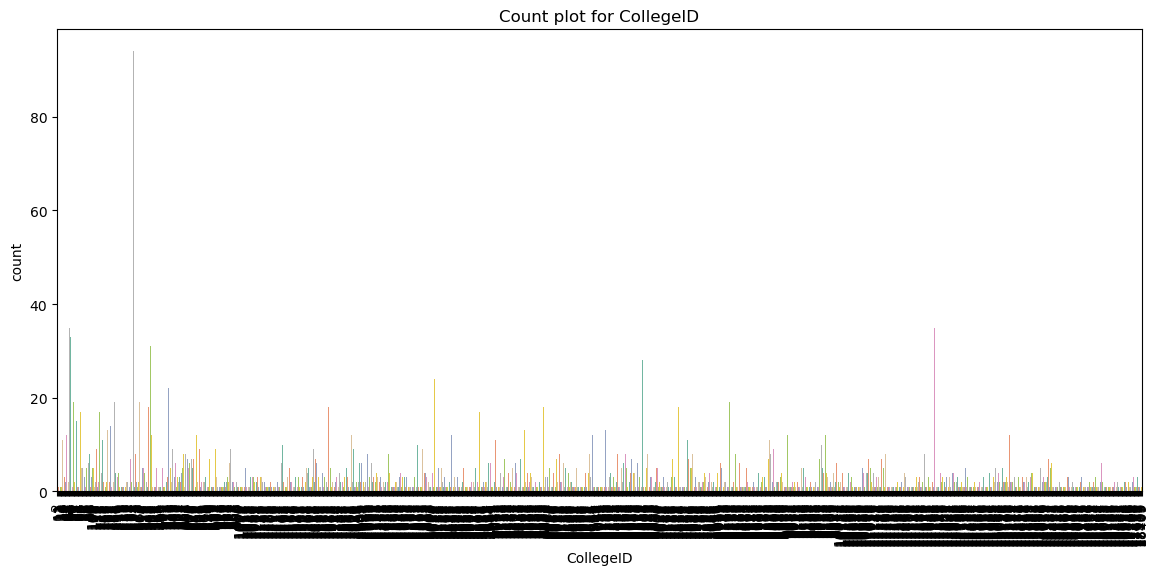

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


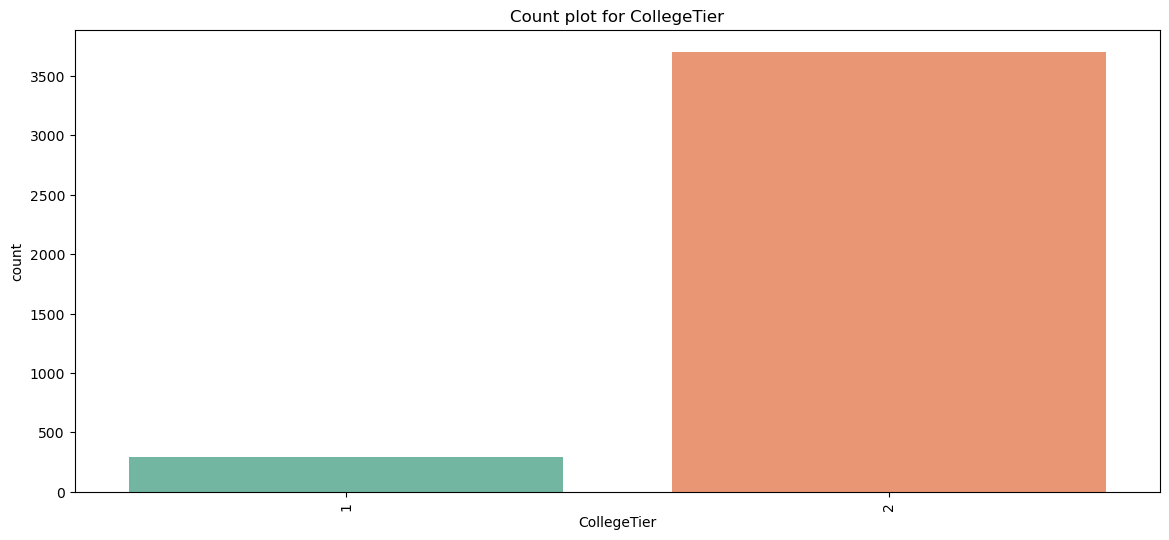

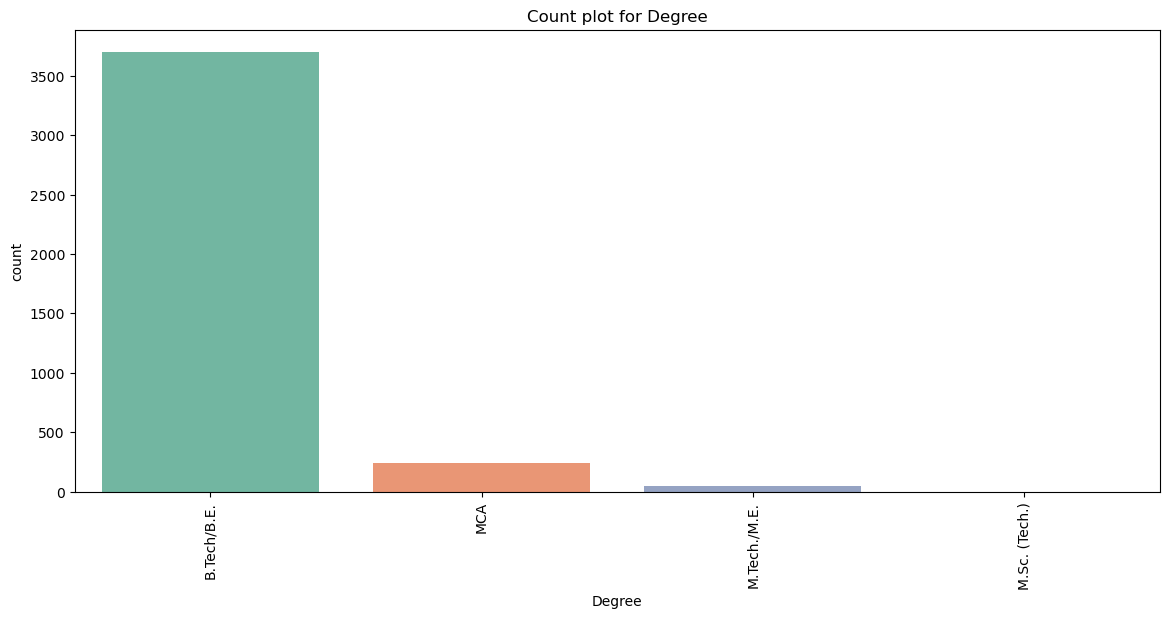

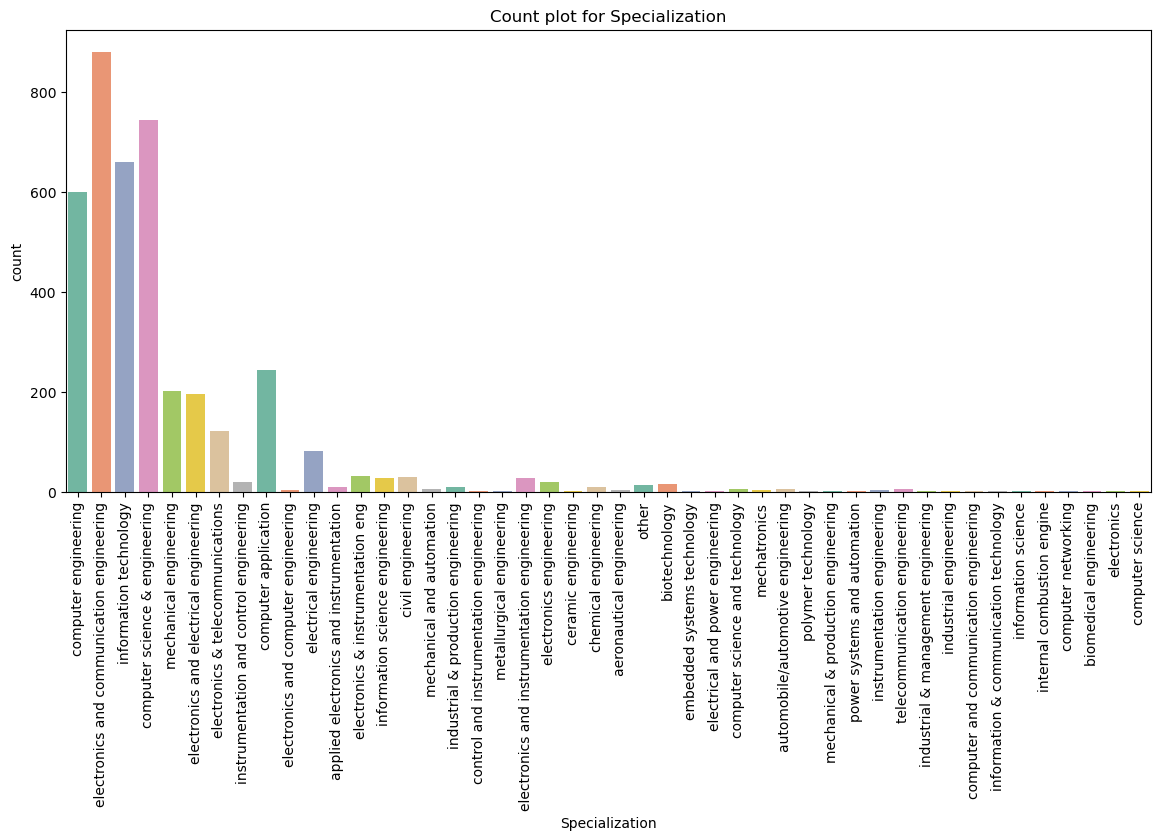

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


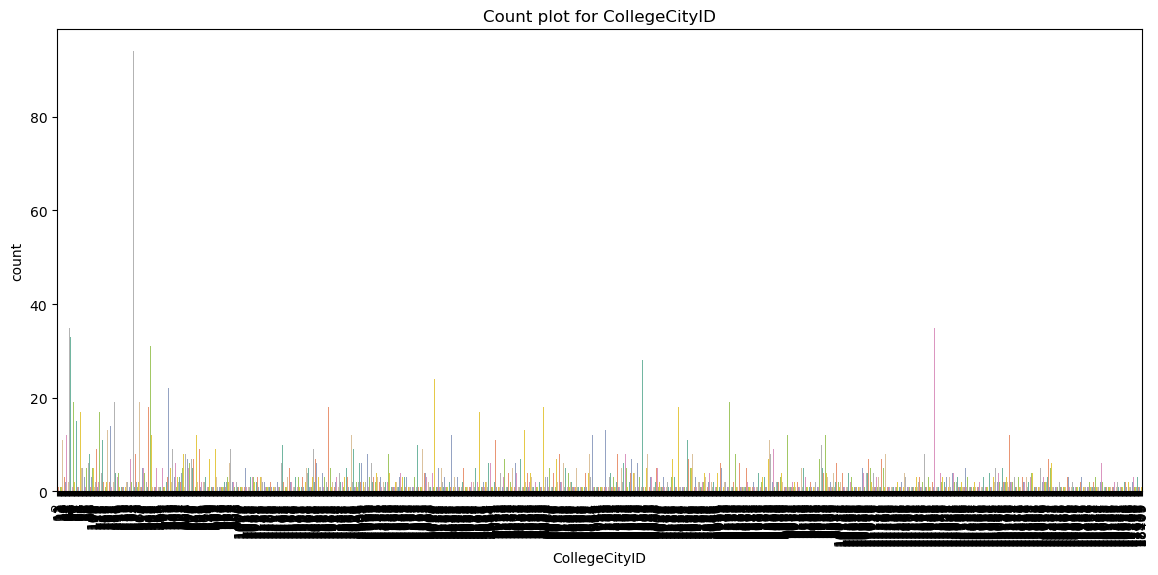

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


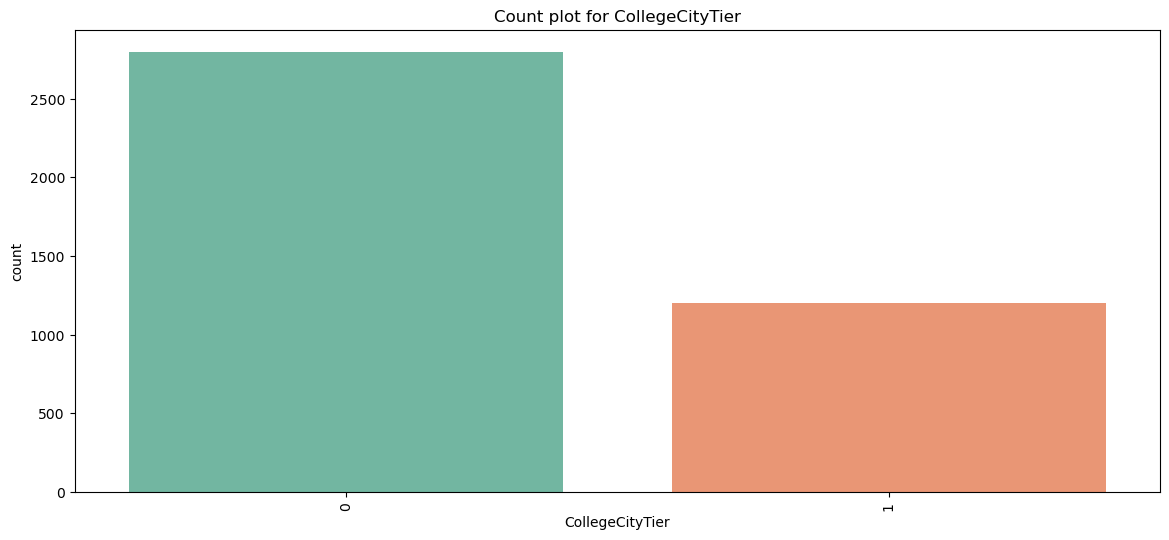

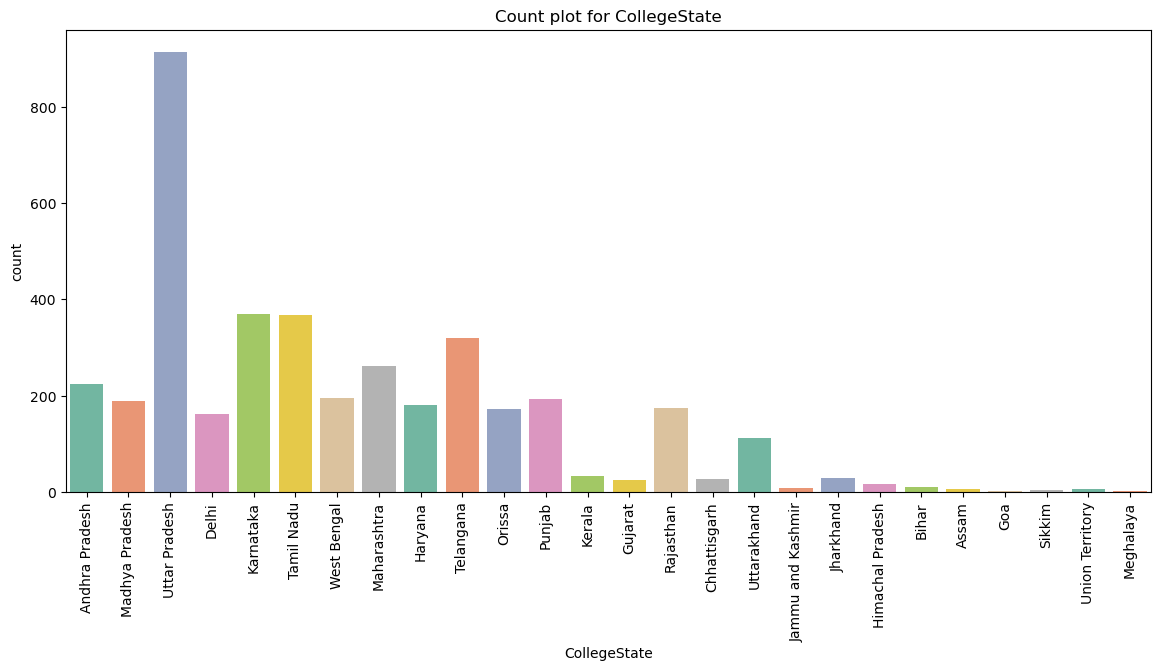

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


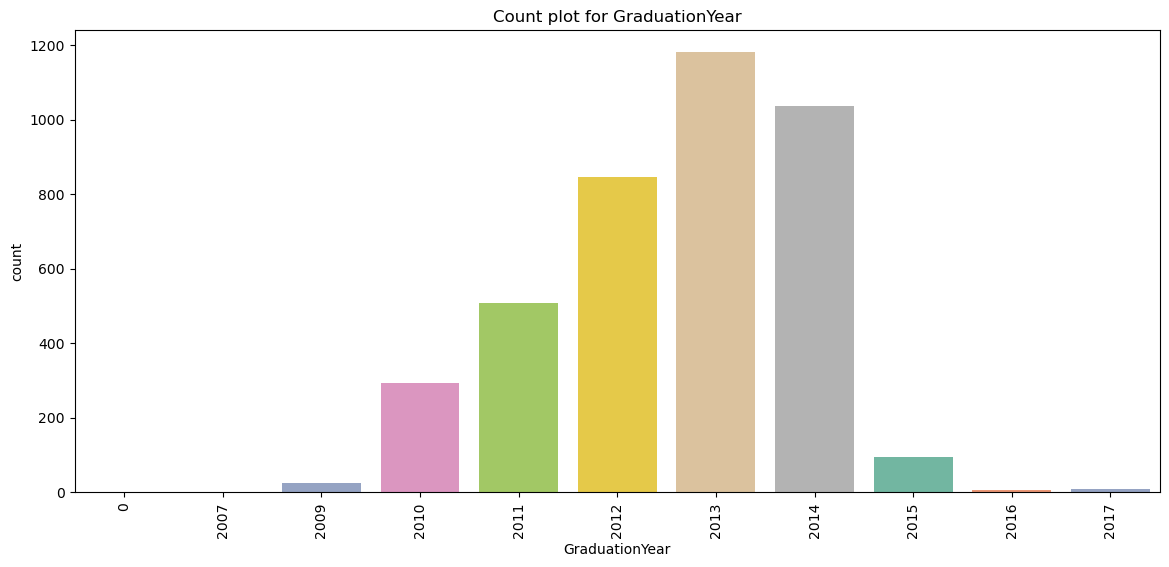

In [19]:
#univariate visual analysis for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(14,6))
    
    #countplot
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count plot for {col}")
    plt.xticks(rotation=90)
    plt.show()

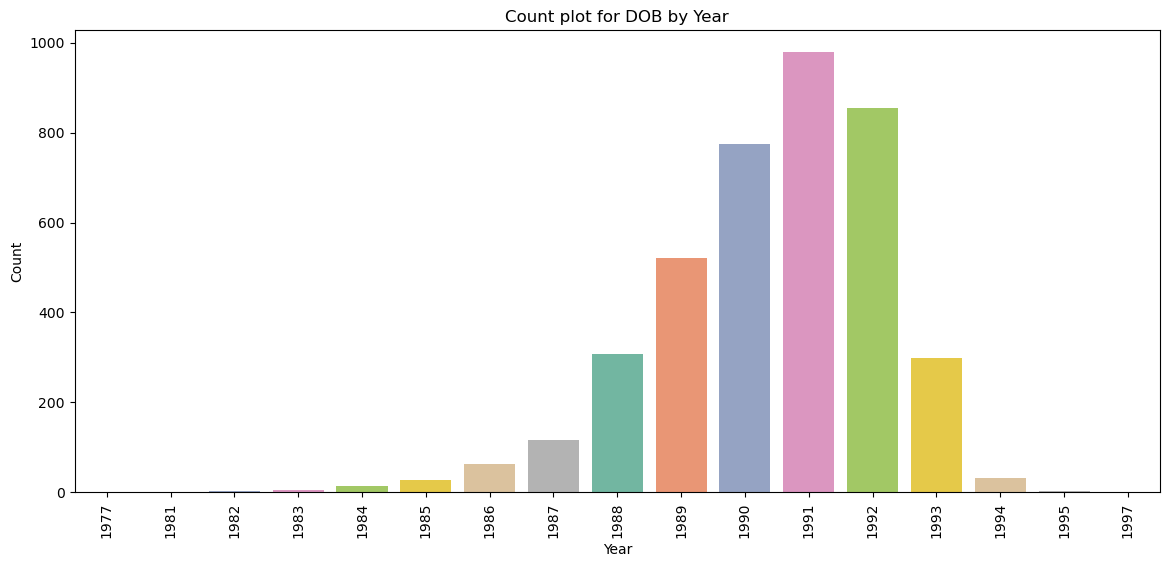

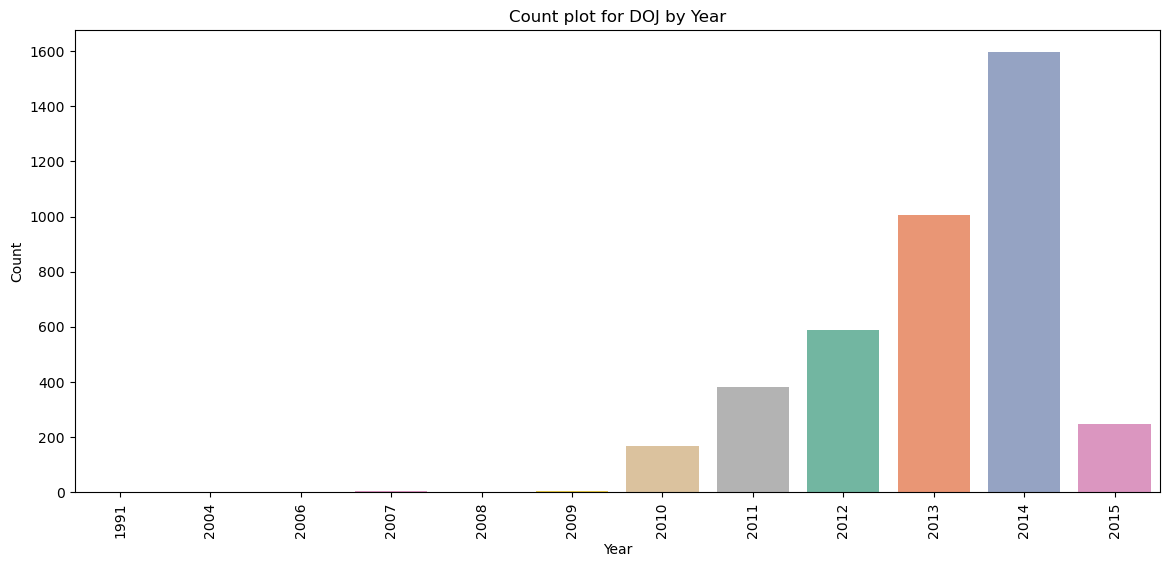

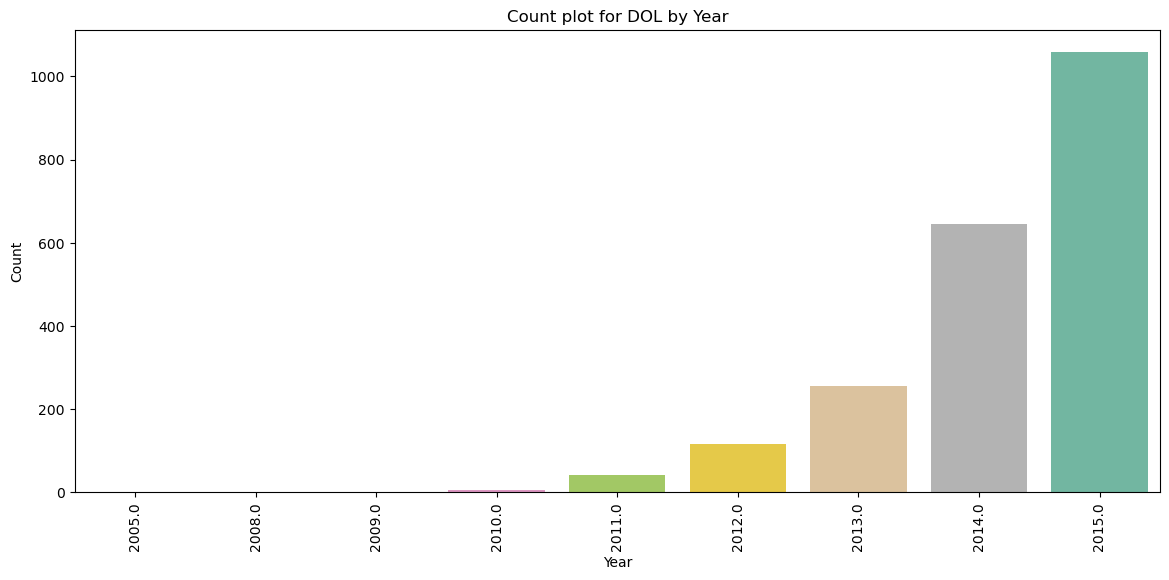

In [21]:
# Attempt to convert the DOB, DOJ, DOL columns to datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')


# List of columns to plot
date_columns = ['DOB', 'DOJ', 'DOL']

# Plotting the count plot for the year-based columns without creating new columns
for col in date_columns:
    plt.figure(figsize=(14, 6))
    
    # Extract year and plot
    year_counts = df[col].dt.year.value_counts().sort_index()
    sns.barplot(x=year_counts.index, y=year_counts.values, palette='Set2')
    plt.title(f"Count plot for {col} by Year")
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [20]:
# Find unique values and count in '10board' column
unique_boards = df['10board'].unique()
unique_boards_count = df['10board'].nunique()

print("Unique Boards:", unique_boards)
print("Count of Unique Boards:", unique_boards_count)


Unique Boards: ['board ofsecondary education,ap' 'cbse' 'state board' 'mp board bhopal'
 'icse' 'karnataka secondary school of examination' 'up'
 'karnataka state education examination board' 'ssc'
 'kerala state technical education' '0' 'bseb'
 'state board of secondary education, andhra pradesh' 'matriculation'
 'gujarat state board' 'karnataka state board' 'wbbse'
 'maharashtra state board' 'icse board' 'up board'
 'board of secondary education(bse) orissa'
 'little jacky matric higher secondary school' 'uttar pradesh board'
 'bsc,orissa' 'mp board' 'upboard' 'matriculation board' 'j & k bord'
 'rbse' 'central board of secondary education' 'pseb' 'jkbose'
 'haryana board of school education,(hbse)' 'metric' 'ms board' 'kseeb'
 'stateboard' 'maticulation' 'karnataka secondory education board'
 'mumbai board' 'sslc' 'kseb' 'board secondary  education' 'matric board'
 'board of secondary education' 'west bengal board of secondary education'
 'jharkhand secondary examination board,ranch

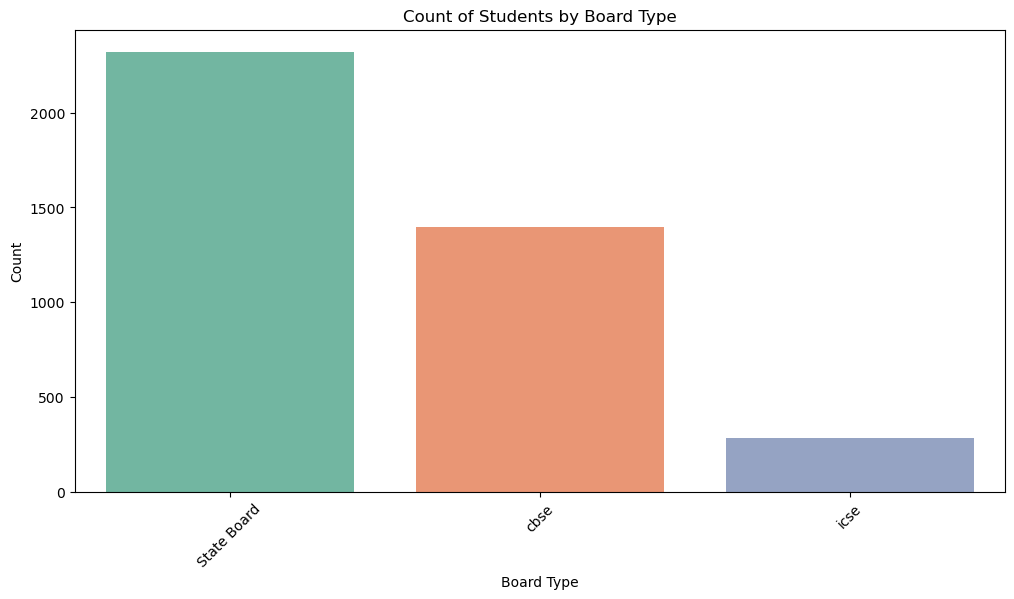

In [22]:
#since there are 275 unique boards and basically there are 3 types of boards,CBSE,ICSE and various state boards, but for simplification purpose i am considering all those state boards as state board itself

# Create a new column for board categorization
df['Board_Type'] = np.where(df['10board'].isin(['cbse', 'icse']), df['10board'], 'State Board')

# Count plot for Board_Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Board_Type', data=df, palette='Set2')
plt.title('Count of Students by Board Type')
plt.xlabel('Board Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

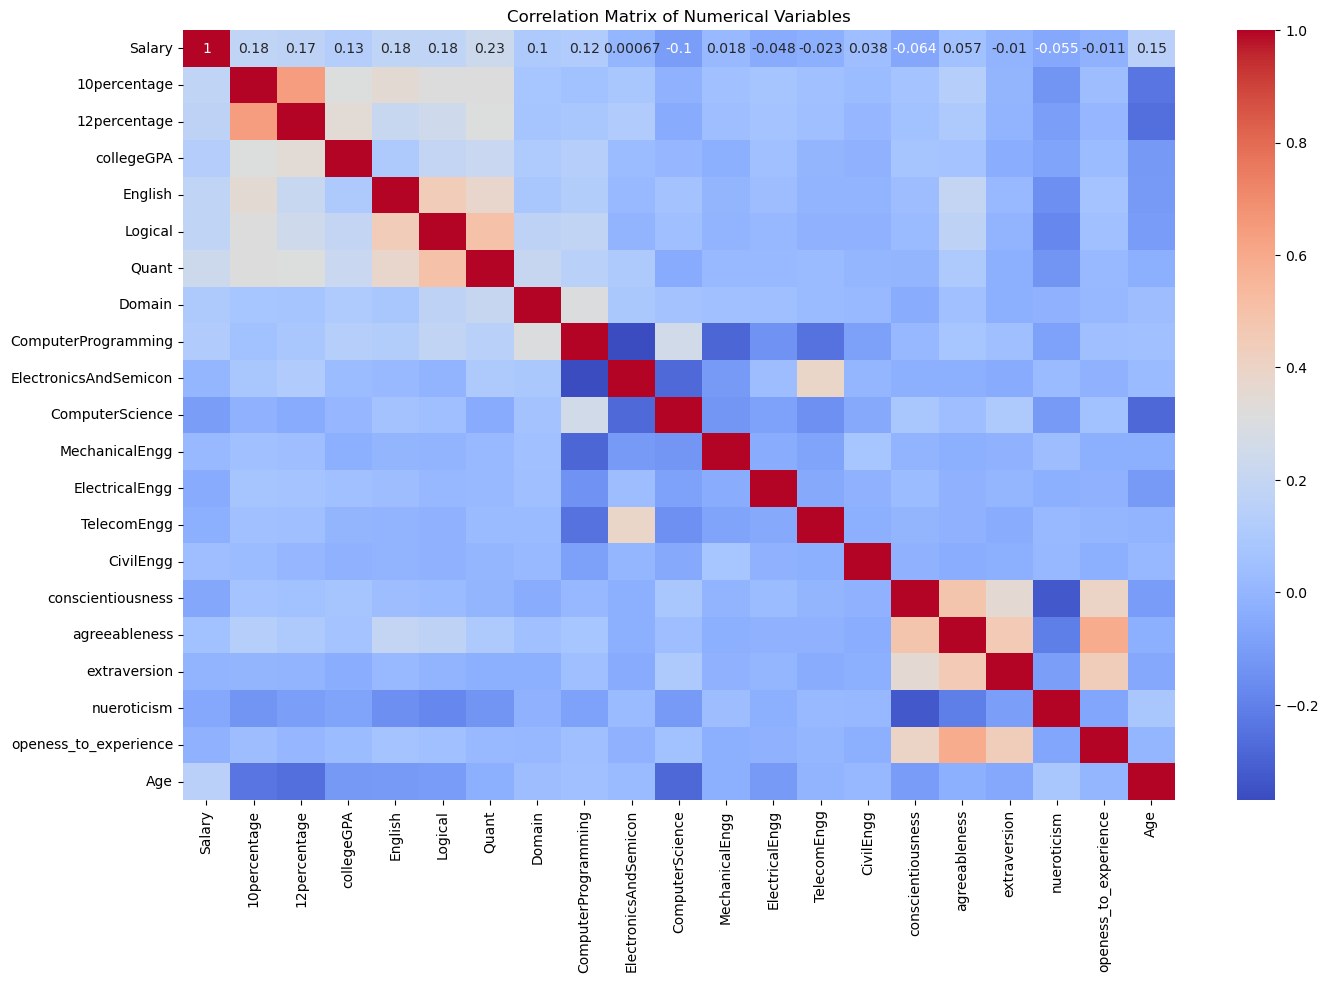

In [23]:
#Bivariate Analysis  --To find relation between the variables or columns
#since there are around approximate 40 columns it is not worth plotting all the plots for each and every pair of columns, so as already it is given that the Target variable is salary, we find relation of salary with some key columns

#Heat Map

# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no 

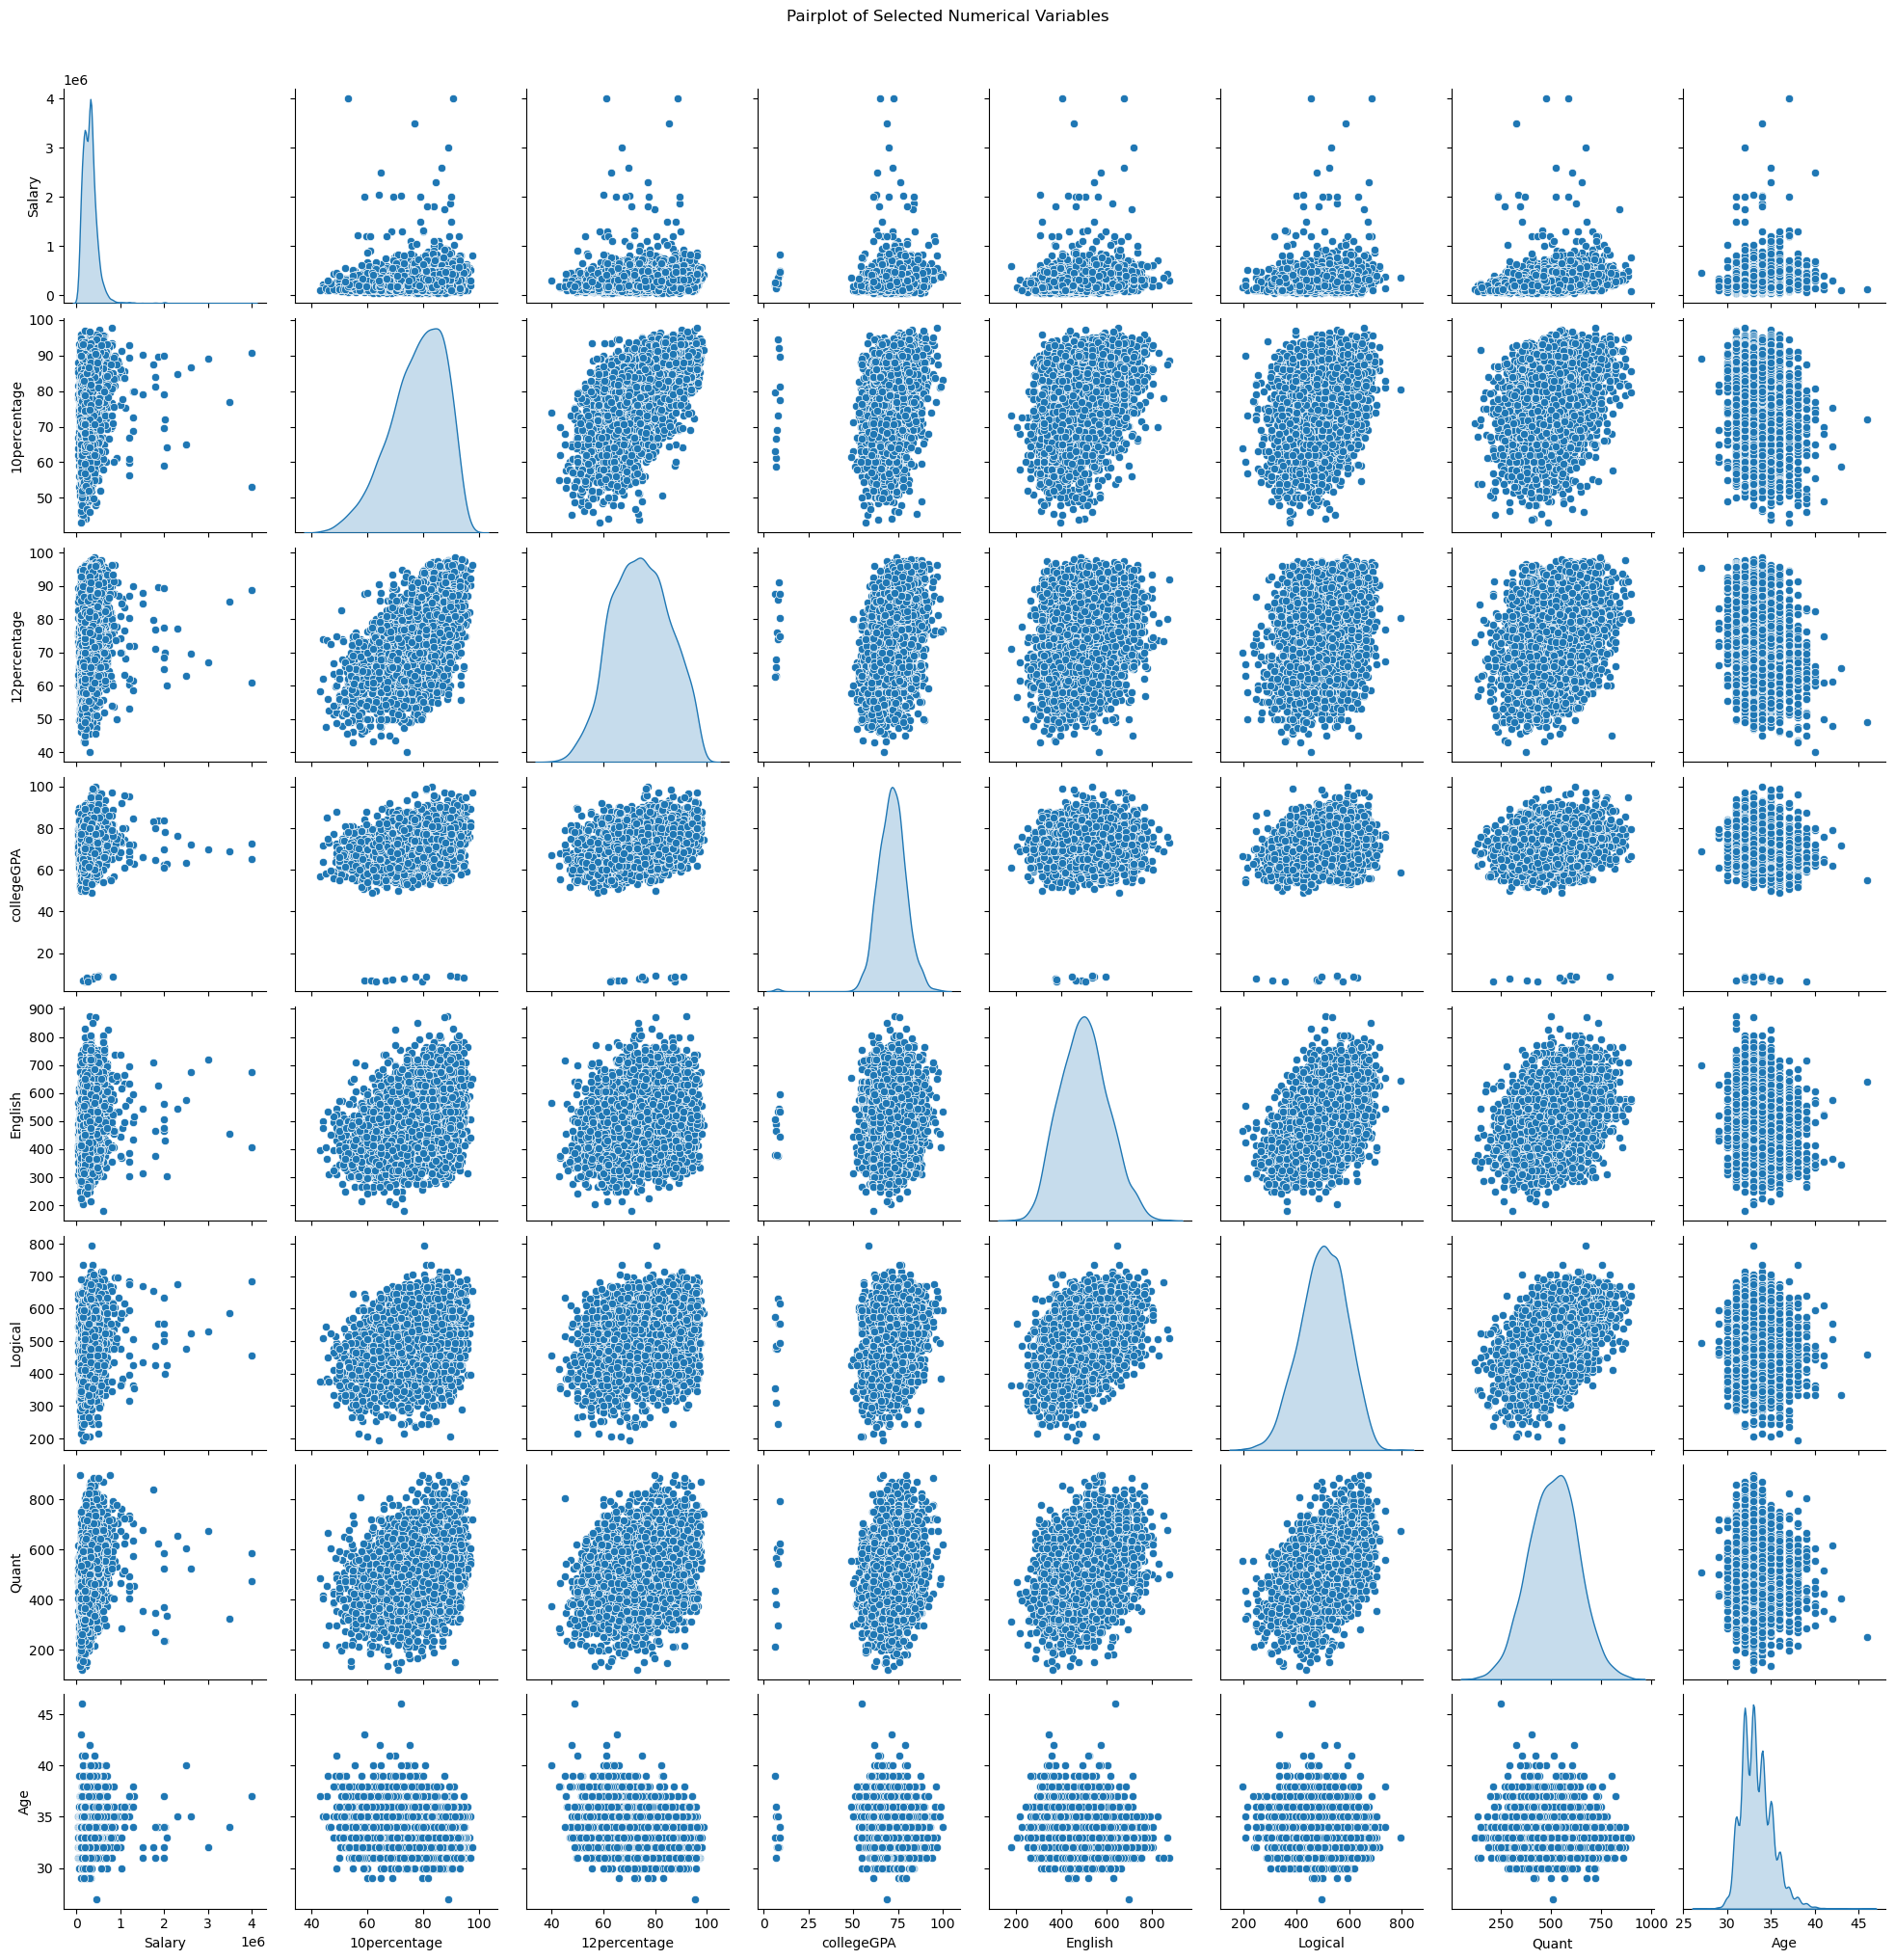

In [28]:
#pairplot of intrested columns
# Selecting numerical columns of interest
selected_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','Age']
# Ensure all these columns are numerical
df_selected = df[selected_cols].dropna()

# Creating a pairplot
sns.pairplot(df_selected, diag_kind='kde', kind='scatter', palette='coolwarm')

# Show the plot
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)  # Adjusting title position
plt.show()


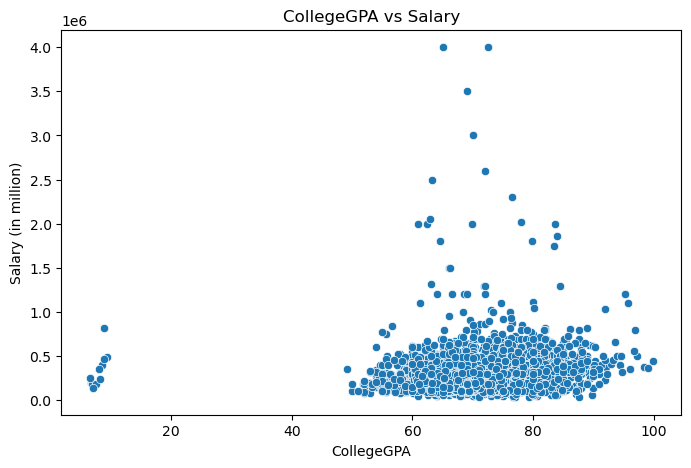

In [29]:
#scatterplot of salary vs CollegeGPA
plt.figure(figsize=(8,5))
#plt.scatter(df['collegeGPA'],df['Salary'])
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.xlabel('CollegeGPA')
plt.ylabel('Salary (in million)')
plt.title('CollegeGPA vs Salary')
plt.show()

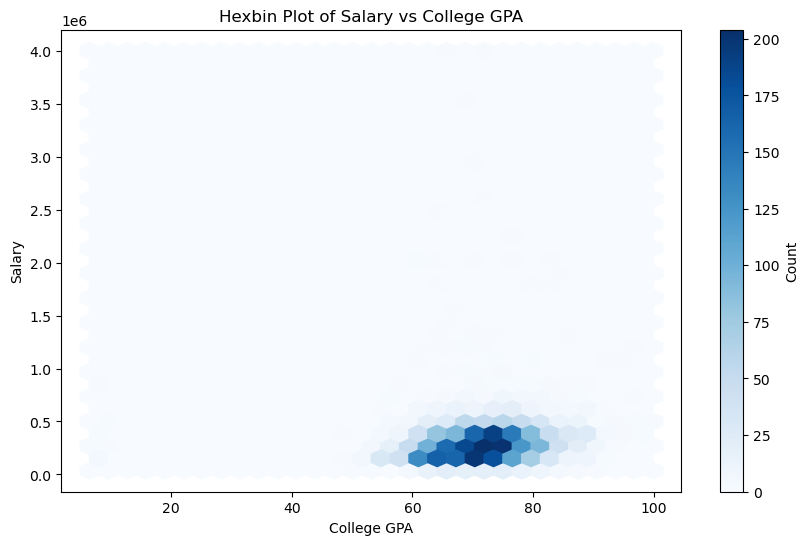

In [30]:
#it is same as above but just the plotting is different
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegeGPA'], df['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

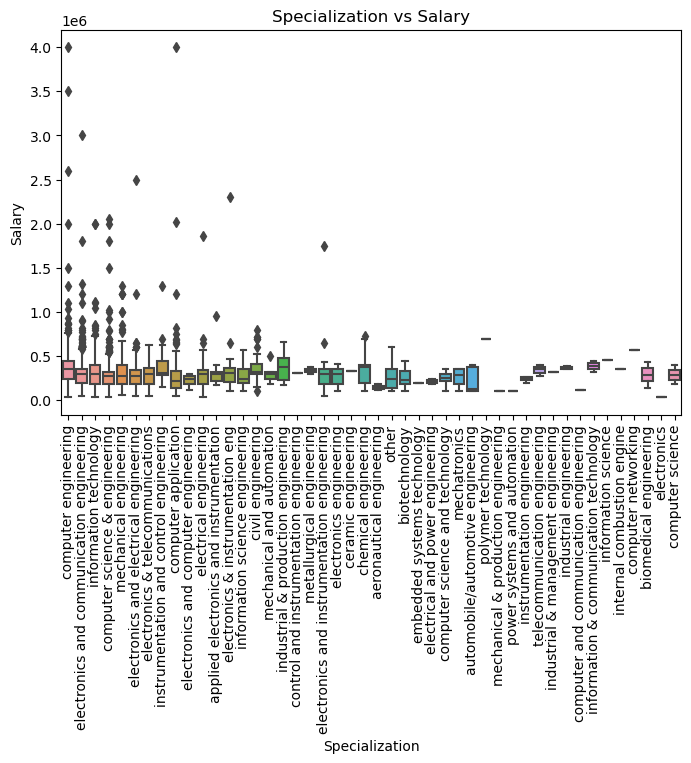

In [31]:
#Box plot of Salary by Specialization
plt.figure(figsize=(8,5))
sns.boxplot(x='Specialization',y='Salary',data=df)
plt.xticks(rotation=90)
plt.title('Specialization vs Salary')
plt.show()

C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


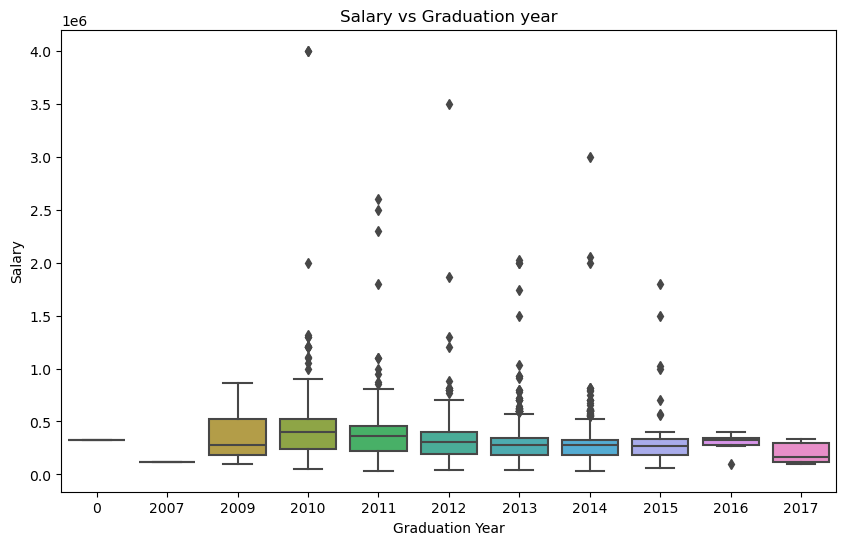

In [32]:
#salary vs Graduation year
plt.figure(figsize=(10,6))
sns.boxplot(x='GraduationYear',y='Salary',data=df)
plt.title("Salary vs Graduation year")
plt.xlabel('Graduation Year')
plt.ylabel('Salary')
plt.show()

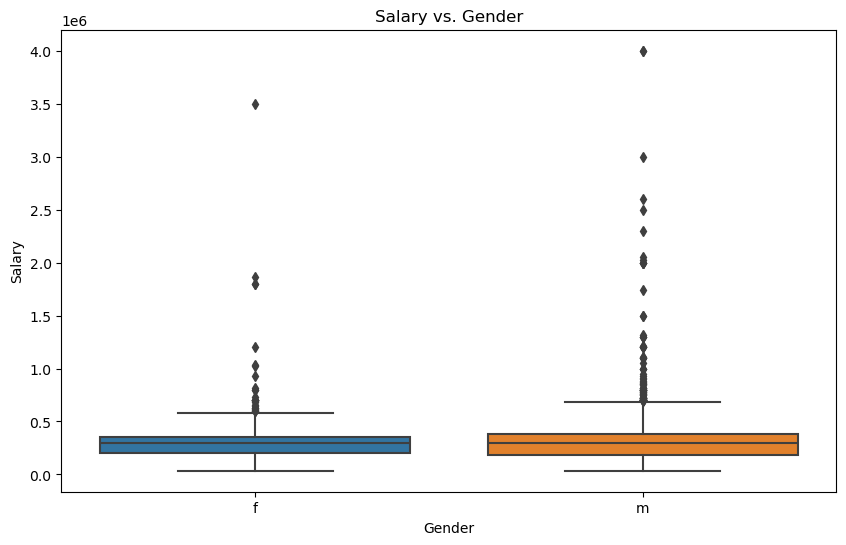

In [33]:
#Salary vs Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

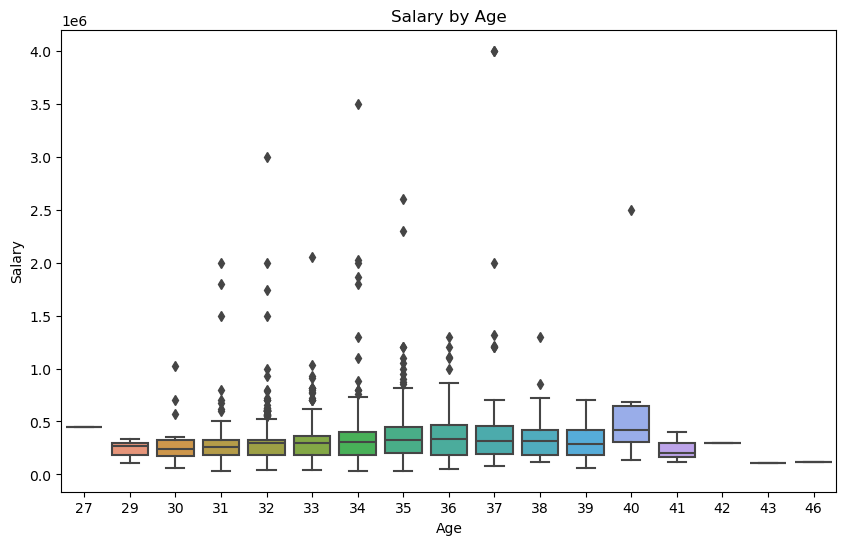

In [34]:
#salary vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Salary', data=df)
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


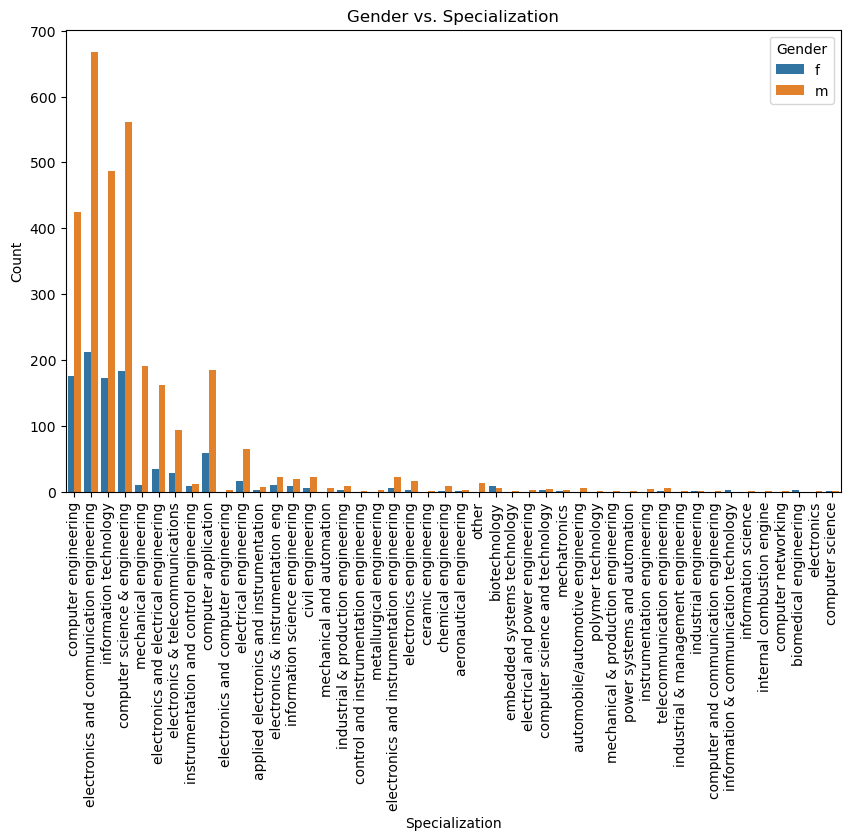

In [35]:
#Gender vs Specialization
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=df)
plt.title('Gender vs. Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


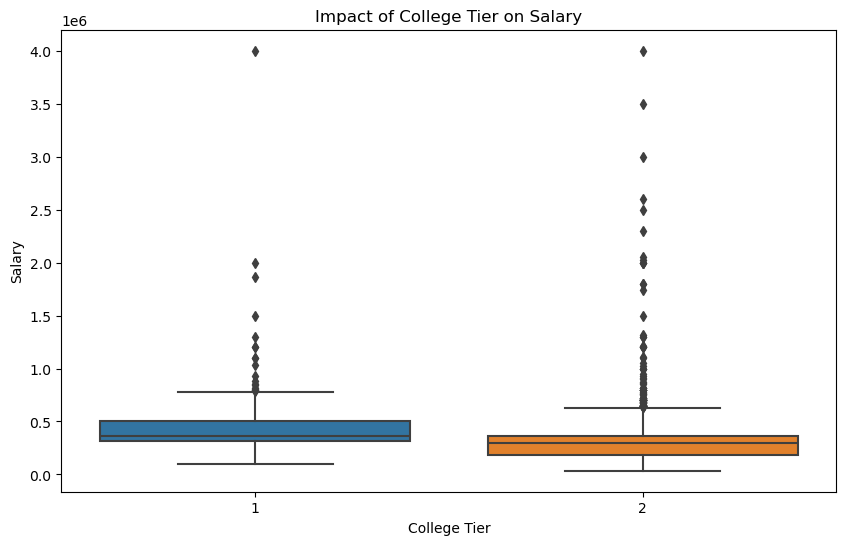

In [36]:
#impact of college tier on salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Impact of College Tier on Salary')
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.show()


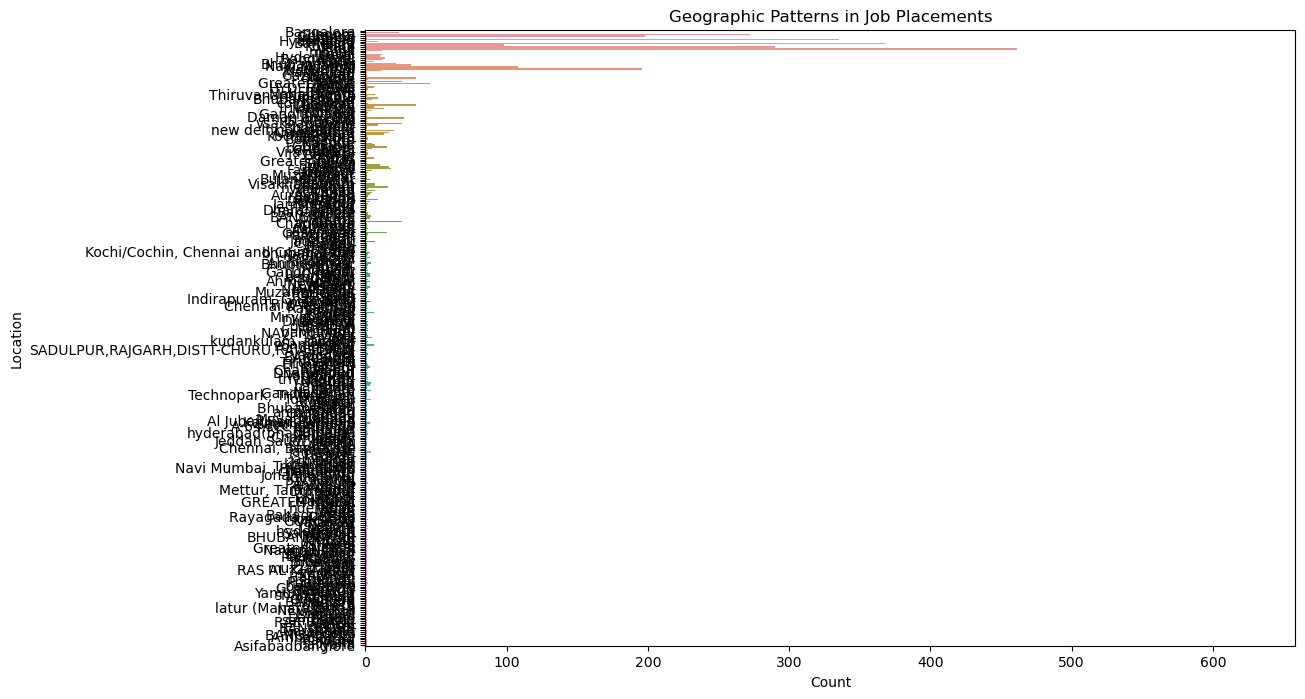

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(y='JobCity', data=df)
plt.title('Geographic Patterns in Job Placements')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


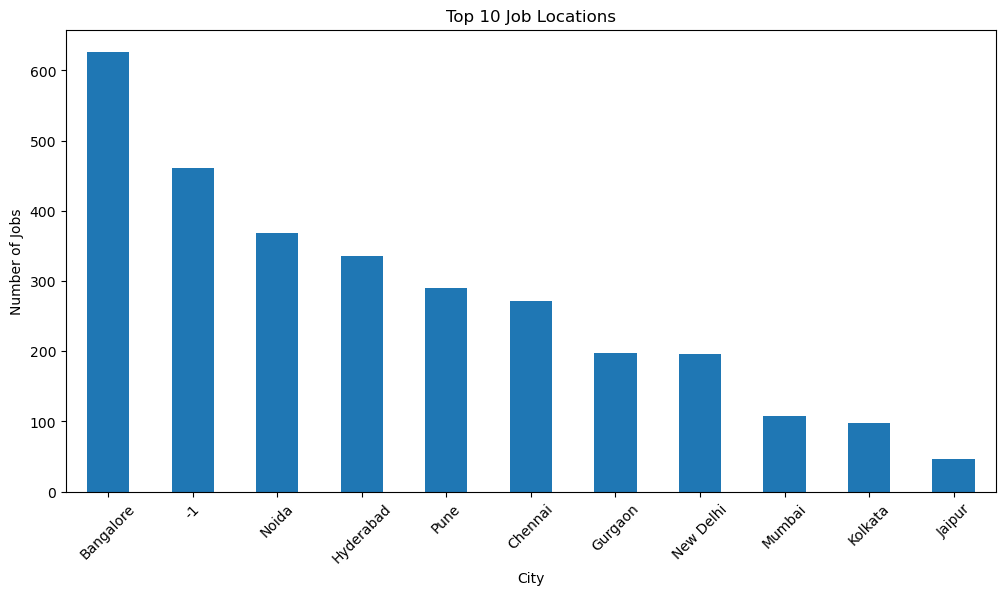

In [38]:
#since there are lots of values lets try to plot only top few locations
# Geographic patterns in job placements
job_locations = df['JobCity'].value_counts().head(11)
plt.figure(figsize=(12, 6))
job_locations.plot(kind='bar')
plt.title('Top 10 Job Locations')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

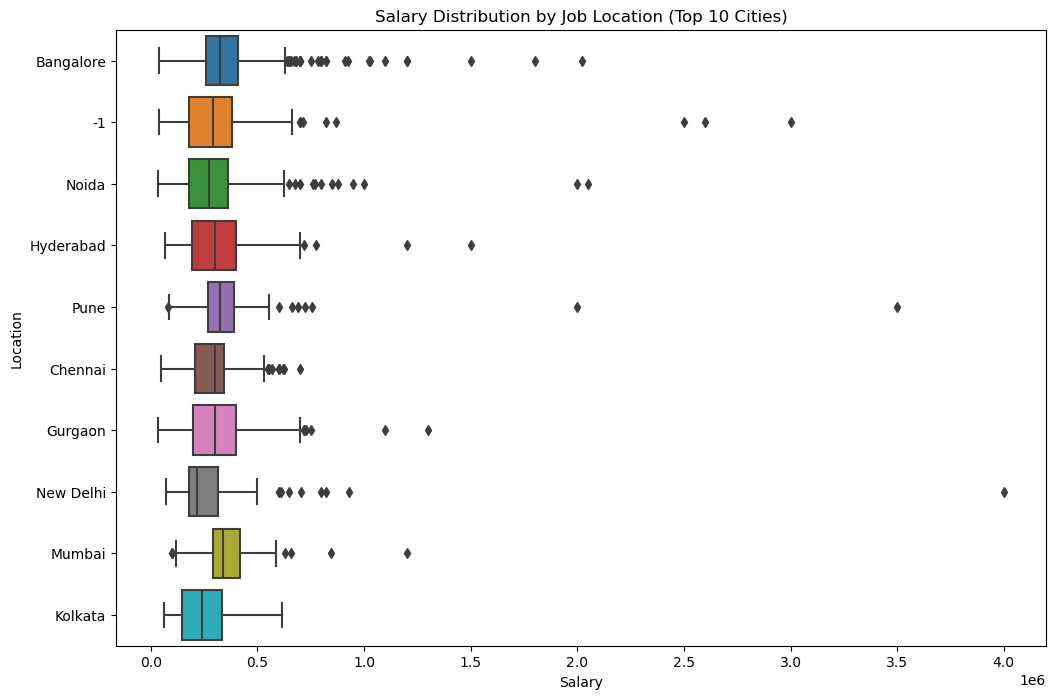

In [39]:
#job location vs salary
plt.figure(figsize=(12, 8))

# Get the top 10 job locations by count
top_10_cities = df['JobCity'].value_counts().nlargest(10).index

# Filter the DataFrame to include only rows where JobCity is in the top 10
top_10_df = df[df['JobCity'].isin(top_10_cities)]

# Plot the boxplot for salary distribution in the top 10 job locations
sns.boxplot(y='JobCity', x='Salary', data=top_10_df, order=top_10_cities)
plt.title('Salary Distribution by Job Location (Top 10 Cities)')
plt.xlabel('Salary')
plt.ylabel('Location')
plt.show()


C:\Users\vamsh\AppData\Local\Temp\ipykernel_4332\701605348.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GraduationYear'].replace("0", np.nan, inplace=True)


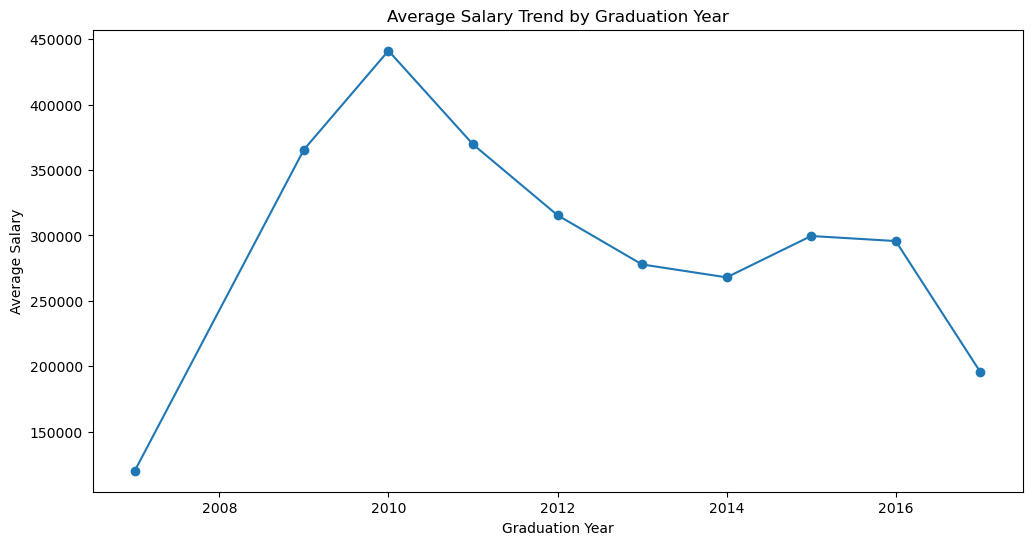

In [40]:
# Salary trends by graduation year

df['GraduationYear'].replace("0", np.nan, inplace=True)

# Drop rows where GraduationYear is NaN or invalid
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'], format='%Y', errors='coerce')

# Group by GraduationYear and calculate average salary
yearly_salary = df.groupby(df['GraduationYear'].dt.year)['Salary'].mean()

# Plot the average salary trend
plt.figure(figsize=(12, 6))
yearly_salary.plot(kind='line', marker='o')

plt.title('Average Salary Trend by Graduation Year')
plt.xlabel('Graduation Year')
plt.ylabel('Average Salary')
plt.show()


In [41]:
# Groupby to calculate the average and median salary for each degree type
degree_salary_stats = df.groupby('Degree')['Salary'].agg(['mean', 'median']).reset_index()

print(degree_salary_stats)


          Degree           mean    median
0    B.Tech/B.E.  308622.702703  300000.0
1  M.Sc. (Tech.)  320000.000000  320000.0
2   M.Tech./M.E.  366132.075472  340000.0
3            MCA  280802.469136  220000.0


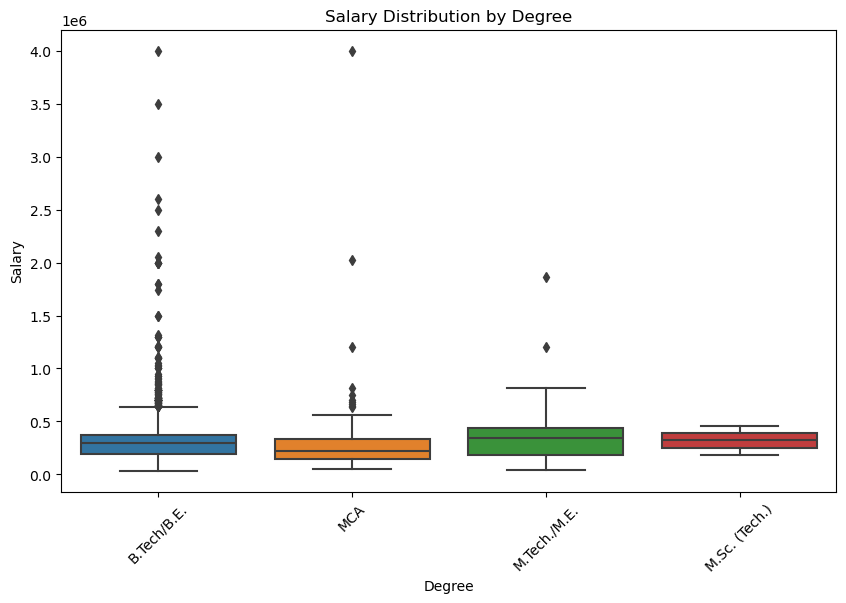

In [42]:
# Assuming 'Degree' and 'Salary' are the columns in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Degree', y='Salary')
plt.title('Salary Distribution by Degree')
plt.xticks(rotation=45)
plt.show()


Average Salary for Computer Science Graduates: 313985.0093691443
Median Salary for Computer Science Graduates: 300000.0


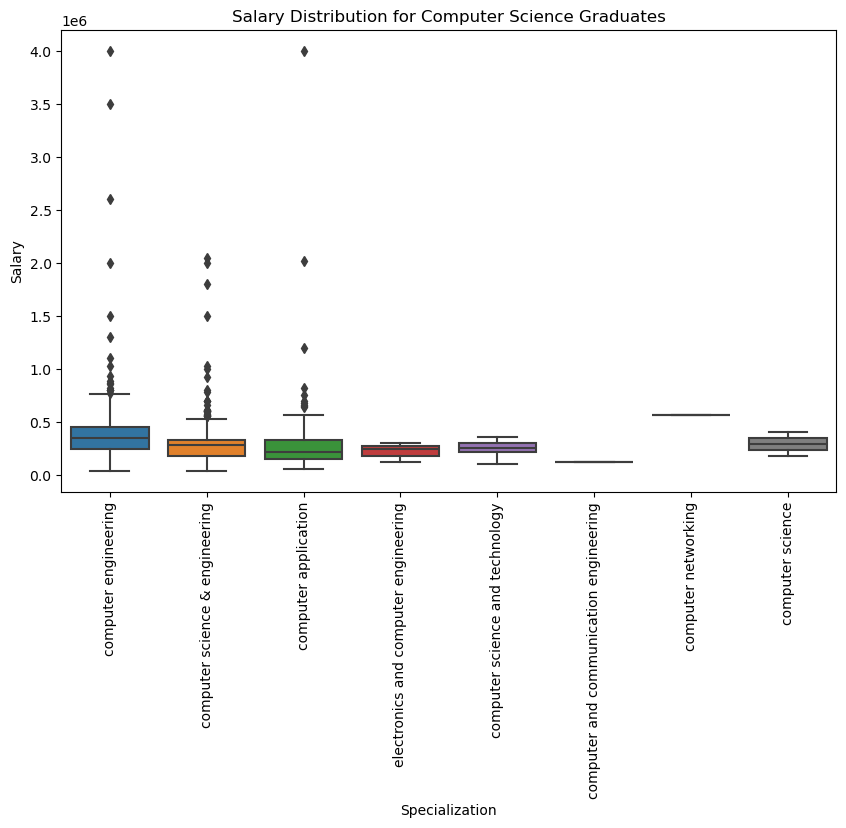

In [43]:
#Research question1
# Trying to understand Salary for Computer Science graduates in specific roles

# Filter data for Computer Science graduates
cs_grads = df[df['Specialization'].str.contains('computer', na=False)]

# Calculate average and median salary
cs_mean_salary = cs_grads['Salary'].mean()
cs_median_salary = cs_grads['Salary'].median()

print(f"Average Salary for Computer Science Graduates: {cs_mean_salary}")
print(f"Median Salary for Computer Science Graduates: {cs_median_salary}")

# Box plot to visualize salary distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Specialization', y='Salary', data=cs_grads)
plt.title('Salary Distribution for Computer Science Graduates')
plt.xticks(rotation=90)
plt.show()

Average salary for fresh CS graduates: 3.35 lakhs
Median salary for fresh CS graduates: 3.20 lakhs


C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


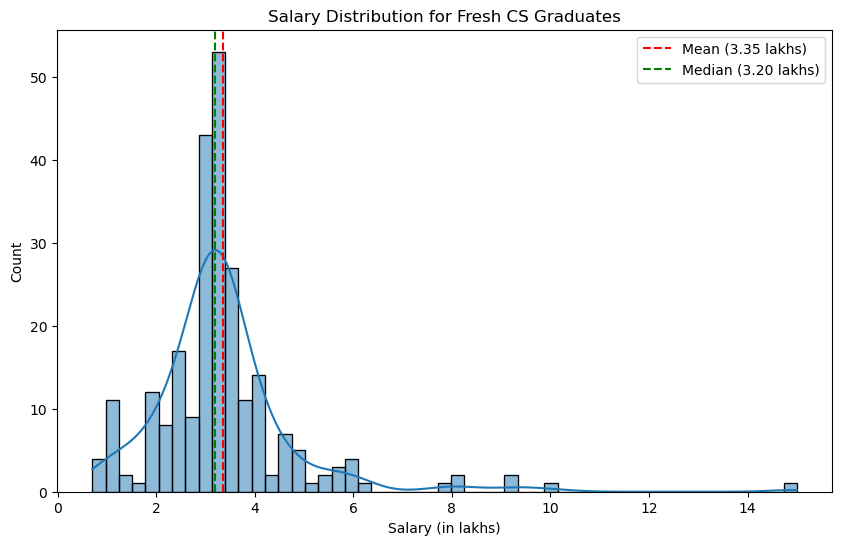

In [44]:
#Research question1: Now the actual research question 1 part;

# Convert Salary to lakhs (assuming salary is annual and in INR)

df1['Salary_Lakhs'] = df1['Salary'] / 100000

# 1. Analyzing the salary claim for fresh CS graduates
cs_jobs = ['programmer analyst', 'software engineer', 'system engineer', 'associate software engineer']
fresh_cs_grads = df1[(df1['Specialization'].str.contains('computer', case=False, na=False)) & 
                    (df1['Designation'].str.lower().isin(cs_jobs)) &
                    (df1['GraduationYear'] >= 2013)]  # Assuming 2013 and later are fresh graduates

avg_salary = fresh_cs_grads['Salary_Lakhs'].mean()
median_salary = fresh_cs_grads['Salary_Lakhs'].median()

print(f"Average salary for fresh CS graduates: {avg_salary:.2f} lakhs")
print(f"Median salary for fresh CS graduates: {median_salary:.2f} lakhs")

# Visualization of salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(fresh_cs_grads['Salary_Lakhs'], kde=True)
plt.title('Salary Distribution for Fresh CS Graduates')
plt.xlabel('Salary (in lakhs)')
plt.ylabel('Count')
plt.axvline(avg_salary, color='r', linestyle='--', label=f'Mean ({avg_salary:.2f} lakhs)')
plt.axvline(median_salary, color='g', linestyle='--', label=f'Median ({median_salary:.2f} lakhs)')
plt.legend()
plt.show()


Chi-square test results:
Chi-square statistic: 104.47
p-value: 0.0000


C:\Users\vamsh\AppData\Local\Temp\ipykernel_4332\2265005776.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

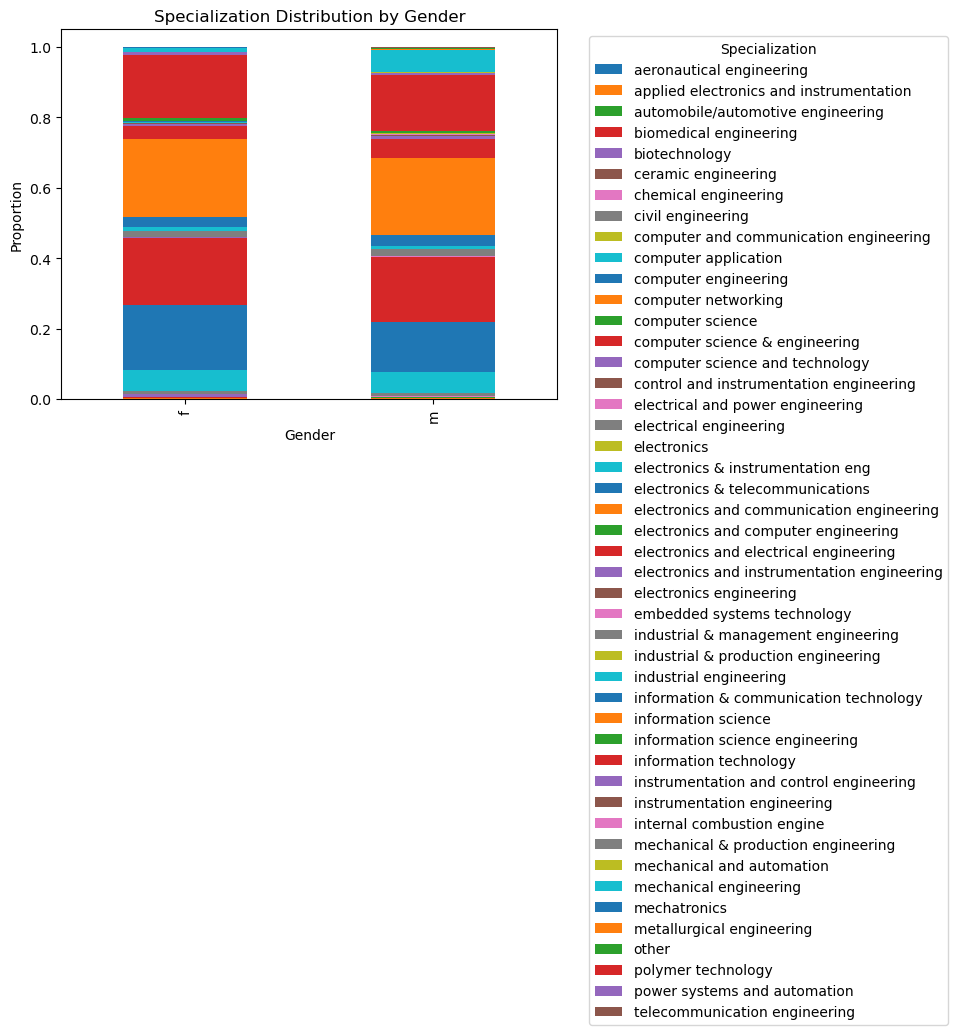

In [45]:
# 2. Relationship between gender and specialization
gender_spec = pd.crosstab(df['Gender'], df['Specialization'])
chi2, p_value, dof, expected = stats.chi2_contingency(gender_spec)

print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Visualization of gender and specialization relationship
plt.figure(figsize=(12, 6))
gender_spec_norm = gender_spec.div(gender_spec.sum(axis=1), axis=0)
gender_spec_norm.plot(kind='bar', stacked=True)
plt.title('Specialization Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 10 Specializations:
Specialization  electronics and communication engineering  \
Gender                                                      
f                                               22.152560   
m                                               21.966458   

Specialization  computer science & engineering  information technology  \
Gender                                                                   
f                                    19.122257               18.077325   
m                                    18.447879               16.014469   

Specialization  computer engineering  computer application  \
Gender                                                       
f                          18.286311              6.165099   
m                          13.975666              6.083525   

Specialization  electronics and electrical engineering  \
Gender                                                   
f                                             3.552769   
m          

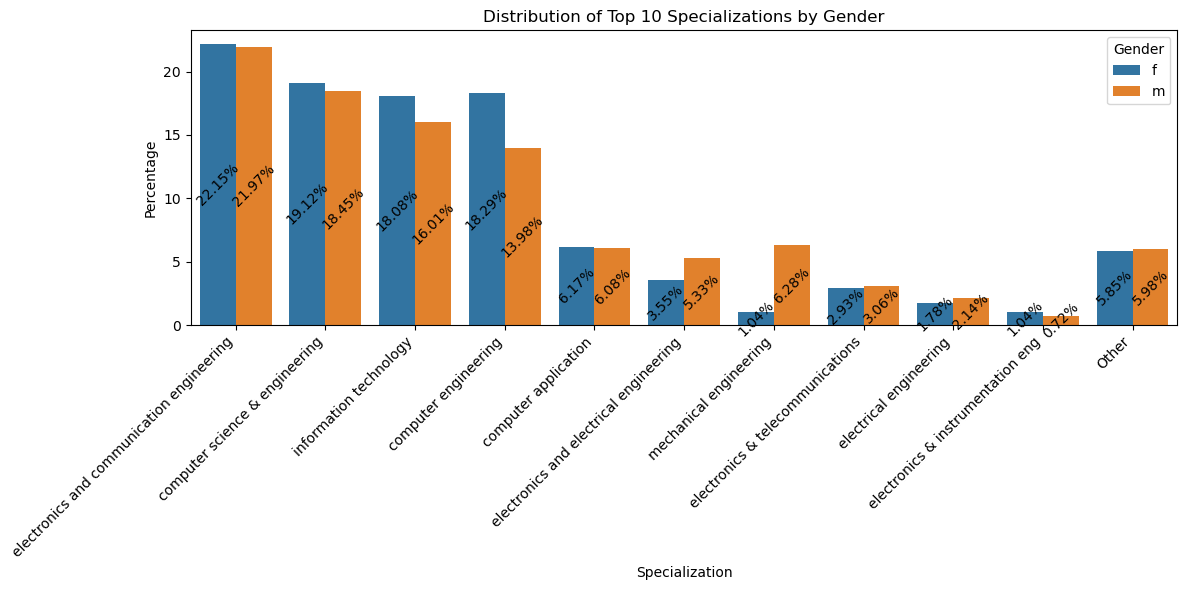

In [46]:
#Research question2

#since the above stackked bar plot is a bit clumsy i am using grooupped bar plot for clear view, although the data is same in both of them
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Calculate percentages
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Get top 5 specializations
top_10 = percentage_table.mean().nlargest(10).index

# Create a new dataframe with top 5 and 'Other'
top_10_df = percentage_table[top_10].copy()
top_10_df['Other'] = 100 - top_10_df.sum(axis=1)

# Melt the dataframe for easier plotting
melted_df = top_10_df.reset_index().melt(id_vars='Gender', var_name='Specialization', value_name='Percentage')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Specialization', y='Percentage', hue='Gender', data=melted_df)

# Customize the plot
plt.title('Distribution of Top 10 Specializations by Gender')
plt.xlabel('Specialization')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f%%', label_type='center',rotation=45)

plt.tight_layout()

# Save the plot
plt.savefig('gender_specialization_distribution_top5.png')

# Display some statistics
print("Top 10 Specializations:")
print(top_10_df)

# Chi-square test for independence
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p_value}")

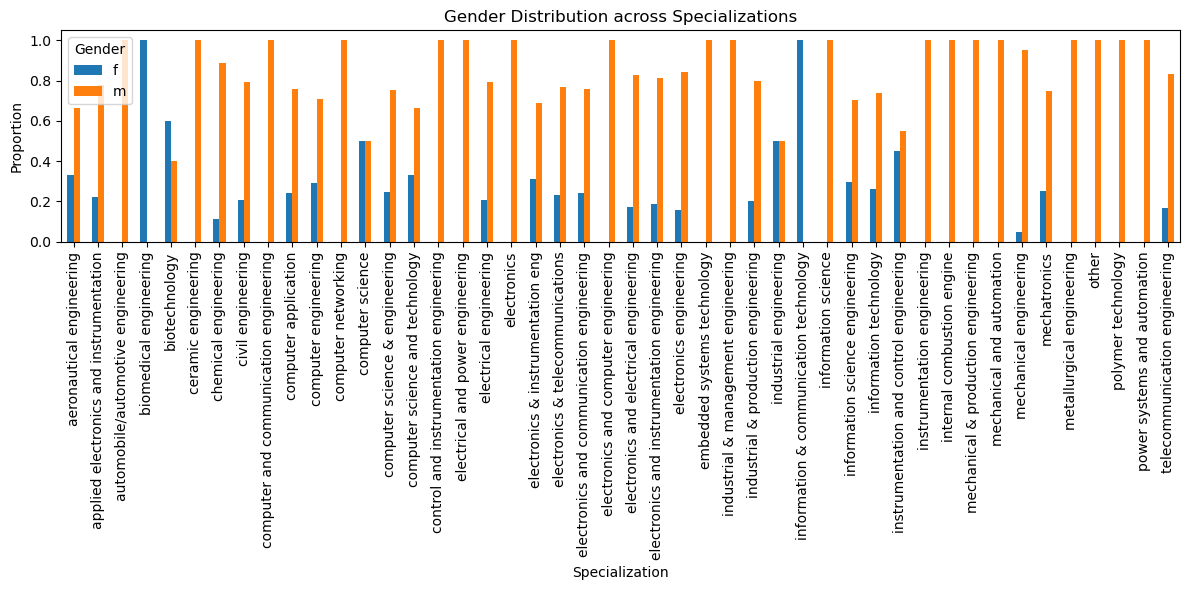

In [47]:
#here i am trying to present the gender distribution across each specialization

# Creating a grouped bar plot with specializations on the x-axis
gender_spec = pd.crosstab(df['Specialization'], df['Gender'], normalize='index')

# Plotting the grouped bar plot
ax = gender_spec.plot(kind='bar', figsize=(12, 6))

# Set plot labels and rotate x-axis for readability
plt.title('Gender Distribution across Specializations')
plt.xlabel('Specialization')
plt.ylabel('Proportion')
plt.xticks(rotation=90)  # Rotate specialization labels on x-axis
plt.tight_layout()
plt.show()

In [ ]:
#some additional plottings(but already covered above, just different styles of plotting thats it.)

ValueError: num must be an integer with 1 <= num <= 16, not 17

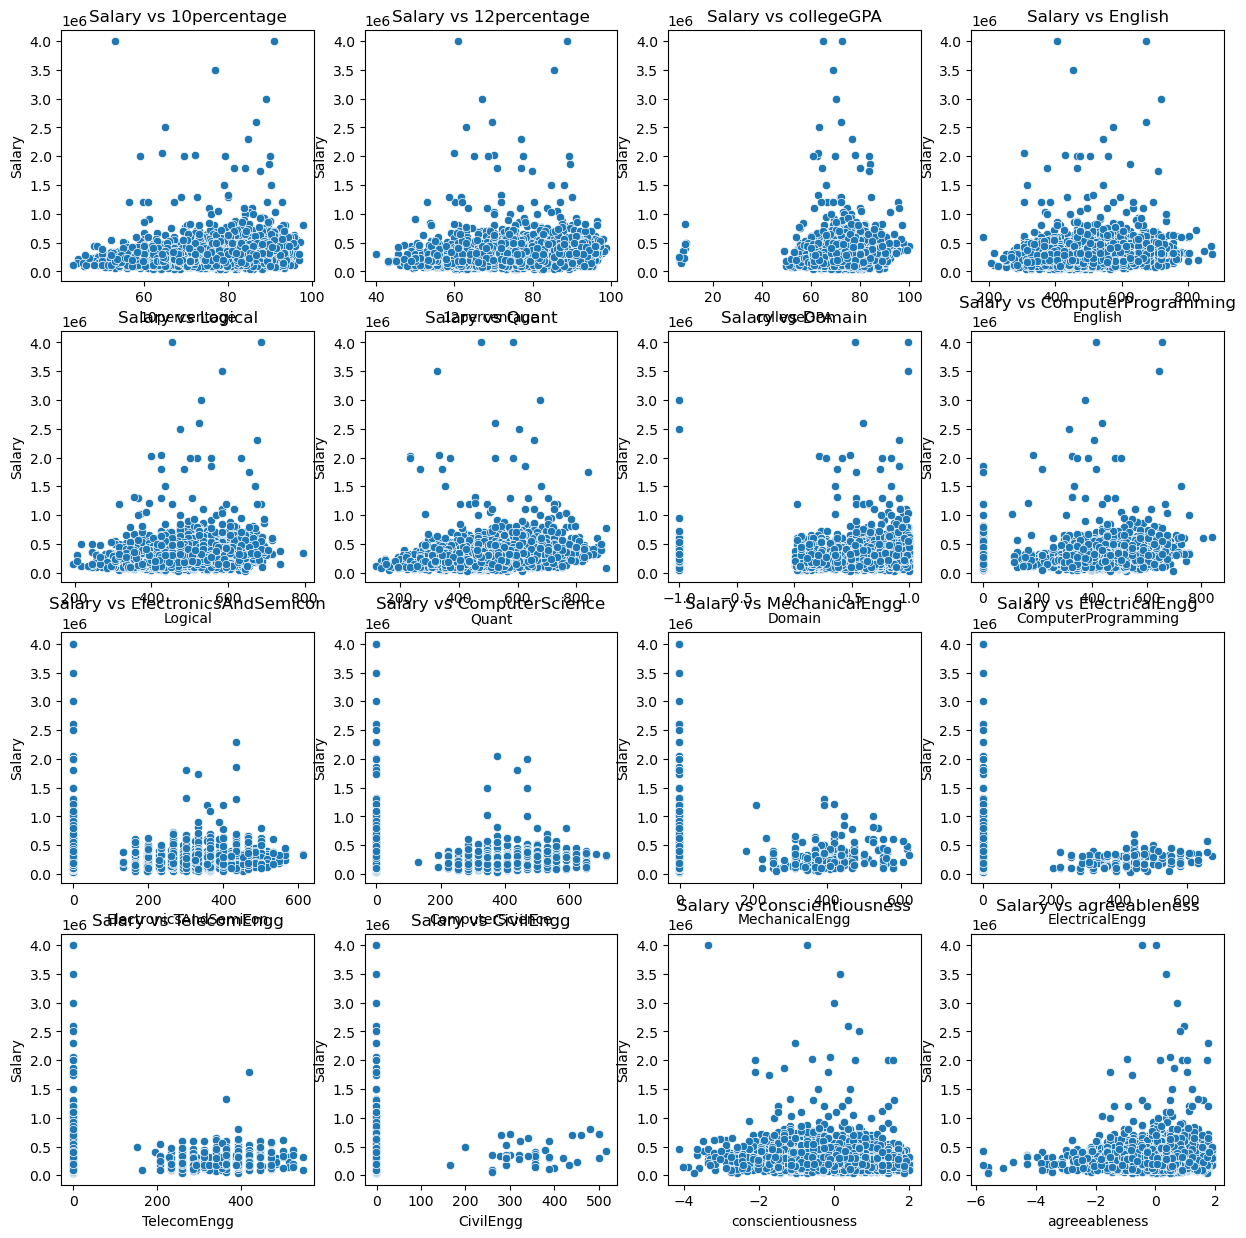

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns (excluding Salary)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Salary')  # Remove Salary from the list

# Set up the plot
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the layout based on the number of numerical columns
    sns.scatterplot(data=df, x=col, y='Salary')
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()


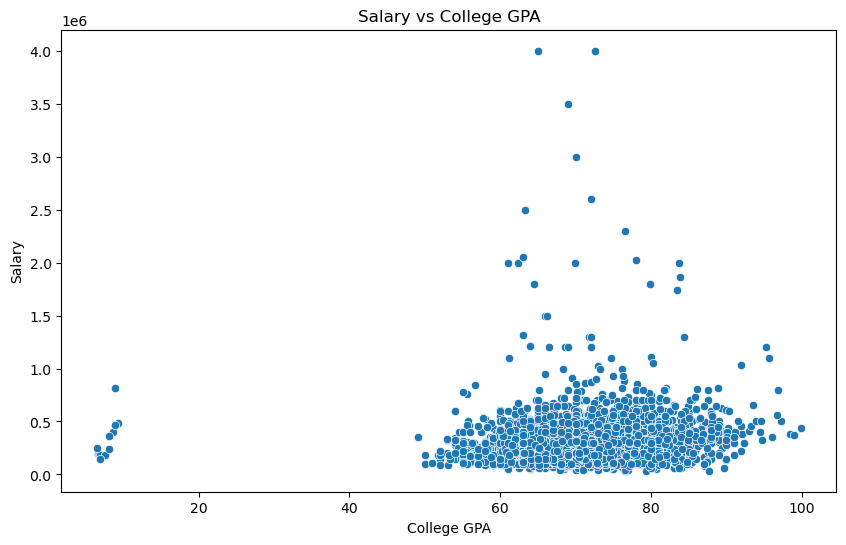

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Salary vs College GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegeGPA', y='Salary')
plt.title('Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()


C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vamsh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the siz

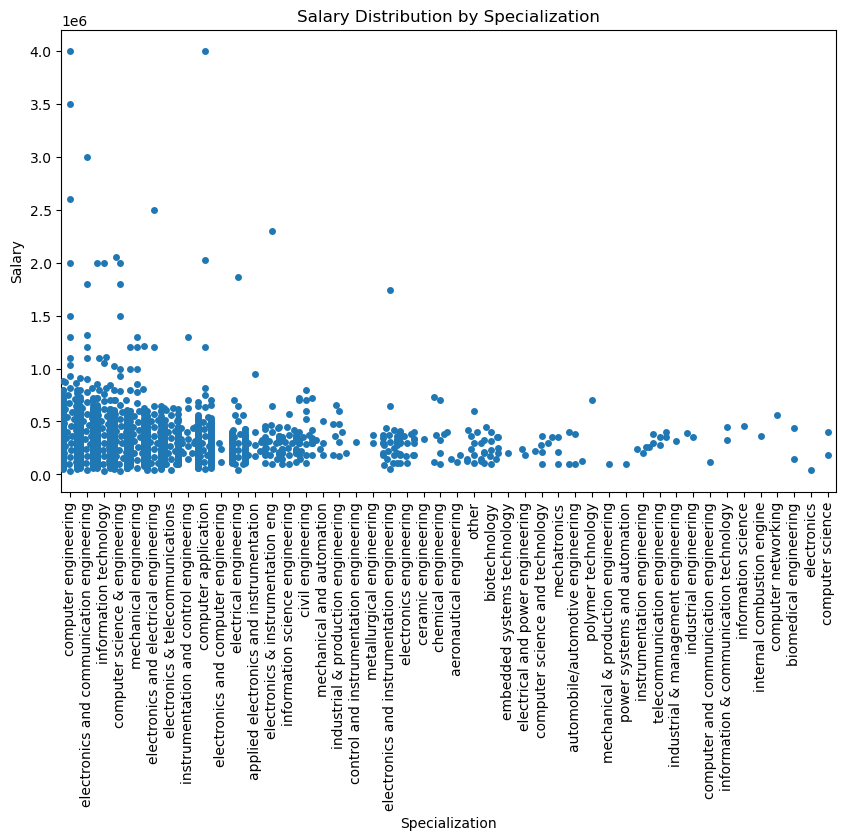

In [67]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Specialization', y='Salary', data=df)
plt.title('Salary Distribution by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
